# Importing Libraries

In [30]:
# Loading necessary libraries: 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from datetime import datetime
import calendar

# Load the dataset

In [31]:
file_path = 'List of orders.csv'
df = pd.read_csv(file_path)

In [32]:
# Import the datasets
print("Importing datasets...\n")

# Import List of Orders dataset
try:
    orders = pd.read_csv('List of Orders.csv')
    print(f"List of Orders dataset loaded successfully with shape: {orders.shape}")
except Exception as e:
    print(f"Error loading List of Orders dataset: {e}")

# Import Order Details dataset
try:
    order_details = pd.read_csv('Order Details.csv')
    print(f"Order Details dataset loaded successfully with shape: {order_details.shape}")
except Exception as e:
    print(f"Error loading Order Details dataset: {e}")

# Import Sales Target dataset
try:
    sales_targets = pd.read_csv('Sales target.csv')
    print(f"Sales Target dataset loaded successfully with shape: {sales_targets.shape}")
except Exception as e:
    print(f"Error loading Sales Target dataset: {e}")

Importing datasets...

List of Orders dataset loaded successfully with shape: (560, 5)
Order Details dataset loaded successfully with shape: (1500, 6)
Sales Target dataset loaded successfully with shape: (36, 3)


# Data Description

#### Orders 

In [33]:
# Dataset Head
orders.head()

,Order ID,Order Date,CustomerName,State,City
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25602,01-04-2018,Pearl,Maharashtra,Pune
2,B-25603,03-04-2018,Jahan,Madhya Pradesh,Bhopal
3,B-25604,03-04-2018,Divsha,Rajasthan,Jaipur
4,B-25605,05-04-2018,Kasheen,West Bengal,Kolkata


In [34]:
# Creating a copy to not modify the original dataset
Orders_df = orders.copy()

print("\n----- List of Orders - First 5 rows -----")
print(orders.head())


----- List of Orders - First 5 rows -----
  Order ID  Order Date CustomerName           State       City
0  B-25601  01-04-2018       Bharat         Gujarat  Ahmedabad
1  B-25602  01-04-2018        Pearl     Maharashtra       Pune
2  B-25603  03-04-2018        Jahan  Madhya Pradesh     Bhopal
3  B-25604  03-04-2018       Divsha       Rajasthan     Jaipur
4  B-25605  05-04-2018      Kasheen     West Bengal    Kolkata


In [35]:
# Display basic info
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      500 non-null    object
 1   Order Date    500 non-null    object
 2   CustomerName  500 non-null    object
 3   State         500 non-null    object
 4   City          500 non-null    object
dtypes: object(5)
memory usage: 22.0+ KB
None


In [36]:
# Display current data types for all datasets
print("=== CURRENT DATA TYPES ===\n")

print("List of Orders data types:")
print(orders.dtypes)
print("\n")

=== CURRENT DATA TYPES ===

List of Orders data types:
Order ID        object
Order Date      object
CustomerName    object
State           object
City            object
dtype: object




In [37]:
print("\n----- Missing Values Analysis -----")
print("\nList of Orders missing values:")
print(orders.isnull().sum())


----- Missing Values Analysis -----

List of Orders missing values:
Order ID        60
Order Date      60
CustomerName    60
State           60
City            60
dtype: int64


In [38]:
# Check for duplicates in List of Orders
print("=== DUPLICATE CHECK: LIST OF ORDERS ===")
total_rows_orders = len(orders)
duplicate_rows_orders = orders.duplicated().sum()
duplicate_percentage_orders = (duplicate_rows_orders / total_rows_orders) * 100 if total_rows_orders > 0 else 0

print(f"Total rows: {total_rows_orders}")
print(f"Duplicate rows: {duplicate_rows_orders} ({duplicate_percentage_orders:.2f}%)")
print(f"Unique Order IDs: {orders['Order ID'].nunique()} (out of {len(orders)})")
print(f"Duplicate Order IDs: {len(orders) - orders['Order ID'].nunique()}")


# If duplicates exist, show examples
print("\n=== SAMPLE DUPLICATES (IF ANY) ===")

if duplicate_rows_orders > 0:
    print("\nDuplicate rows in List of Orders:")
    print(orders[orders.duplicated(keep=False)].head())

=== DUPLICATE CHECK: LIST OF ORDERS ===
Total rows: 560
Duplicate rows: 59 (10.54%)
Unique Order IDs: 500 (out of 560)
Duplicate Order IDs: 60

=== SAMPLE DUPLICATES (IF ANY) ===

Duplicate rows in List of Orders:
    Order ID Order Date CustomerName State City
500      NaN        NaN          NaN   NaN  NaN
501      NaN        NaN          NaN   NaN  NaN
502      NaN        NaN          NaN   NaN  NaN
503      NaN        NaN          NaN   NaN  NaN
504      NaN        NaN          NaN   NaN  NaN


#### Order Details

In [39]:
# Dataset Head
order_details.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,168.0,-111.0,2,Electronics,Phones


In [40]:
# Creating a copy to not modify the original dataset
order_details_df = order_details.copy()

print("\n----- Order Details - First 5 rows -----")
print(order_details.head())


----- Order Details - First 5 rows -----
  Order ID  Amount  Profit  Quantity     Category      Sub-Category
0  B-25601  1275.0 -1148.0         7    Furniture         Bookcases
1  B-25601    66.0   -12.0         5     Clothing             Stole
2  B-25601     8.0    -2.0         3     Clothing       Hankerchief
3  B-25601    80.0   -56.0         4  Electronics  Electronic Games
4  B-25602   168.0  -111.0         2  Electronics            Phones


In [41]:
print("Order Details data types:")
print(order_details.dtypes)
print("\n")

Order Details data types:
Order ID         object
Amount          float64
Profit          float64
Quantity          int64
Category         object
Sub-Category     object
dtype: object




In [42]:
# Check for missing values
print("\n----- Missing Values Analysis -----")
print("\nOrder Details missing values:")
print(order_details.isnull().sum())


----- Missing Values Analysis -----

Order Details missing values:
Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
dtype: int64


In [43]:
# Check for duplicates in Order Details
print("\n=== DUPLICATE CHECK: ORDER DETAILS ===")
total_rows_details = len(order_details)
duplicate_rows_details = order_details.duplicated().sum()
duplicate_percentage_details = (duplicate_rows_details / total_rows_details) * 100 if total_rows_details > 0 else 0

print(f"Total rows: {total_rows_details}")
print(f"Duplicate rows: {duplicate_rows_details} ({duplicate_percentage_details:.2f}%)")

# Check duplicates based on Order ID and Sub-Category combination
order_subcat_dup = order_details.duplicated(subset=['Order ID', 'Sub-Category']).sum()
print(f"Duplicate Order ID + Sub-Category combinations: {order_subcat_dup}")

# If duplicates exist, show examples
print("\n=== SAMPLE DUPLICATES (IF ANY) ===")
if order_details.duplicated().sum() > 0:
    print("\nDuplicate rows in Order Details:")
    print(order_details[order_details.duplicated(keep=False)].head())


=== DUPLICATE CHECK: ORDER DETAILS ===
Total rows: 1500
Duplicate rows: 0 (0.00%)
Duplicate Order ID + Sub-Category combinations: 236

=== SAMPLE DUPLICATES (IF ANY) ===


#### Sales Targets

In [44]:
# Dataset Head
sales_targets.head()

,Month of Order Date,Category,Target
0,Apr-18,Furniture,10400.0
1,May-18,Furniture,10500.0
2,Jun-18,Furniture,10600.0
3,Jul-18,Furniture,10800.0
4,Aug-18,Furniture,10900.0


In [45]:
# Creating a copy to not modify the original dataset
sales_target_df = sales_targets.copy()

print("\n----- Sales Target - First 5 rows -----")
print(sales_targets.head())


----- Sales Target - First 5 rows -----
  Month of Order Date   Category   Target
0              Apr-18  Furniture  10400.0
1              May-18  Furniture  10500.0
2              Jun-18  Furniture  10600.0
3              Jul-18  Furniture  10800.0
4              Aug-18  Furniture  10900.0


In [46]:
print("Sales Target data types:")
print(sales_targets.dtypes)
print("\n")

Sales Target data types:
Month of Order Date     object
Category                object
Target                 float64
dtype: object




In [47]:
# Check for missing values
print("\n----- Missing Values Analysis -----")
print("\nSales Target missing values:")
print(sales_targets.isnull().sum())


----- Missing Values Analysis -----

Sales Target missing values:
Month of Order Date    0
Category               0
Target                 0
dtype: int64


In [48]:
# Check for duplicates in Sales Targets
print("\n=== DUPLICATE CHECK: SALES TARGETS ===")
total_rows_targets = len(sales_targets)
duplicate_rows_targets = sales_targets.duplicated().sum()
duplicate_percentage_targets = (duplicate_rows_targets / total_rows_targets) * 100 if total_rows_targets > 0 else 0

print(f"Total rows: {total_rows_targets}")
print(f"Duplicate rows: {duplicate_rows_targets} ({duplicate_percentage_targets:.2f}%)")

# Check duplicates based on Month and Category combination
month_category_dup = sales_targets.duplicated(subset=['Month of Order Date', 'Category']).sum()
print(f"Duplicate Month + Category combinations: {month_category_dup}")


=== DUPLICATE CHECK: SALES TARGETS ===
Total rows: 36
Duplicate rows: 0 (0.00%)
Duplicate Month + Category combinations: 0


In [49]:
# If duplicates exist, show examples
print("\n=== SAMPLE DUPLICATES (IF ANY) ===")
if sales_targets.duplicated().sum() > 0:
    print("\nDuplicate rows in Sales Targets:")
    print(sales_targets[sales_targets.duplicated(keep=False)].head())


=== SAMPLE DUPLICATES (IF ANY) ===


# Pre Processing and Cleaning

## Handling Null Data

#### Finding the null % of the values. If the % exceeds 50, then it's better to drop the rows. 

In [50]:
# Function to check and display missing values
def check_missing_values(df, dataset_name):
    print(f"\n----- Missing Values Analysis for {dataset_name} -----")
    
    # Count missing values
    missing_values = df.isnull().sum()
    
    # Calculate percentage of missing values
    null_percentages = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
    
    # Create a summary DataFrame
    missing_summary = pd.DataFrame({
        'Missing Values': missing_values,
        'Percentage (%)': null_percentages
    })
    
    # Display only columns with missing values
    missing_cols = missing_summary[missing_summary['Missing Values'] > 0]
    
    if len(missing_cols) > 0:
        print(f"\n{dataset_name} missing values:")
        for col, row in missing_cols.iterrows():
            print(f"{col:<15} {int(row['Missing Values'])}")
        print(f"dtype: {df.dtypes.iloc[0]}")
    else:
        print(f"\n{dataset_name} has no missing values.")

# Check missing values in all datasets
check_missing_values(orders, "List of Orders")
check_missing_values(order_details, "Order Details")
check_missing_values(sales_targets, "Sales Target")

# Additional overall summary
print("\n----- Overall Missing Values Summary -----")
datasets = {
    "List of Orders": orders,
    "Order Details": order_details,
    "Sales Target": sales_targets
}

for name, df in datasets.items():
    total_missing = df.isnull().sum().sum()
    total_elements = df.size
    pct_missing = (total_missing / total_elements) * 100
    print(f"{name}: {total_missing} missing values out of {total_elements} elements ({pct_missing:.2f}%)")


----- Missing Values Analysis for List of Orders -----

List of Orders missing values:
Order ID        60
Order Date      60
CustomerName    60
State           60
City            60
dtype: object

----- Missing Values Analysis for Order Details -----

Order Details has no missing values.

----- Missing Values Analysis for Sales Target -----

Sales Target has no missing values.

----- Overall Missing Values Summary -----
List of Orders: 300 missing values out of 2800 elements (10.71%)
Order Details: 0 missing values out of 9000 elements (0.00%)
Sales Target: 0 missing values out of 108 elements (0.00%)


In [51]:
# Function to calculate and display percentage of missing values
def missing_values_percentage(df, dataset_name):
    print(f"\n----- Percentage of Missing Values in {dataset_name} -----")
    
    # Calculate percentage of missing values in each column
    null_percentages = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
    
    # Format and display results
    for col, pct in null_percentages.items():
        if pct > 0:  # Only show columns with missing values
            print(f"{col:<20} {pct:.2f}%")
    
    # Calculate total percentage of missing values in the dataset
    total_missing = df.isnull().sum().sum()
    total_elements = df.size
    total_percentage = (total_missing / total_elements) * 100
    
    print(f"\nTotal missing values: {total_missing} out of {total_elements} elements ({total_percentage:.2f}%)")

# Apply the function to each dataset
missing_values_percentage(orders, "List of Orders")
missing_values_percentage(order_details, "Order Details")
missing_values_percentage(sales_targets, "Sales Target")

# Summary comparison table
print("\n----- Summary of Missing Values Across Datasets -----")
datasets = [orders, order_details, sales_targets]
dataset_names = ["List of Orders", "Order Details", "Sales Target"]

summary_data = []
for i, df in enumerate(datasets):
    missing_count = df.isnull().sum().sum()
    total_elements = df.size
    percentage = (missing_count / total_elements) * 100
    summary_data.append([dataset_names[i], missing_count, total_elements, percentage])

summary_df = pd.DataFrame(summary_data, columns=["Dataset", "Missing Values", "Total Elements", "Percentage"])
print(summary_df.to_string(index=False, float_format=lambda x: f"{x:.2f}%"))


----- Percentage of Missing Values in List of Orders -----
Order ID             10.71%
Order Date           10.71%
CustomerName         10.71%
State                10.71%
City                 10.71%

Total missing values: 300 out of 2800 elements (10.71%)

----- Percentage of Missing Values in Order Details -----

Total missing values: 0 out of 9000 elements (0.00%)

----- Percentage of Missing Values in Sales Target -----

Total missing values: 0 out of 108 elements (0.00%)

----- Summary of Missing Values Across Datasets -----
       Dataset  Missing Values  Total Elements  Percentage
List of Orders             300            2800      10.71%
 Order Details               0            9000       0.00%
  Sales Target               0             108       0.00%


In [53]:
# Define categorical and numerical columns
categorical_columns = ['State', 'City', 'CustomerName']
# Order ID is an identifier so we'll handle it differently
# Order Date should be treated as datetime, not numerical

# Replace missing values in categorical columns with the mode
for col in categorical_columns:
    orders[col].fillna(orders[col].mode()[0], inplace=True)

# For Order Date, we could use the median date
if 'Order Date' in orders.columns:
    # First convert to datetime if it's not already
    orders['Order Date'] = pd.to_datetime(orders['Order Date'], errors='coerce')
    # Then fill with median date
    median_date = orders['Order Date'].median()
    orders['Order Date'].fillna(median_date, inplace=True)

# For Order ID, we might want to create new unique IDs for missing values
# This is only if you need to preserve the number of rows
missing_order_ids = orders['Order ID'].isnull()
if missing_order_ids.sum() > 0:
    # Get the highest existing Order ID and create new ones
    max_id = orders['Order ID'].dropna().astype(str).str.extract('(\d+)').astype(float).max().max()
    new_ids = [f"GENERATED_{int(max_id + i + 1)}" for i in range(missing_order_ids.sum())]
    orders.loc[missing_order_ids, 'Order ID'] = new_ids

print("After imputation:")
print(orders.head())
print("\nMissing values after imputation:")
print(orders.isnull().sum())

After imputation:
  Order ID Order Date CustomerName           State       City
0  B-25601 2018-01-04       Bharat         Gujarat  Ahmedabad
1  B-25602 2018-01-04        Pearl     Maharashtra       Pune
2  B-25603 2018-03-04        Jahan  Madhya Pradesh     Bhopal
3  B-25604 2018-03-04       Divsha       Rajasthan     Jaipur
4  B-25605 2018-05-04      Kasheen     West Bengal    Kolkata

Missing values after imputation:
Order ID        0
Order Date      0
CustomerName    0
State           0
City            0
dtype: int64


<>:23: SyntaxWarning: invalid escape sequence '\d'
<>:23: SyntaxWarning: invalid escape sequence '\d'
/var/folders/9m/f5jl8xnd4ls2_3ykntk1_rpm0000gn/T/ipykernel_17133/1777298150.py:23: SyntaxWarning: invalid escape sequence '\d'
  max_id = orders['Order ID'].dropna().astype(str).str.extract('(\d+)').astype(float).max().max()
/var/folders/9m/f5jl8xnd4ls2_3ykntk1_rpm0000gn/T/ipykernel_17133/1777298150.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders[col].fillna(orders[col].mode()[0], inplace=True)
/var/folders/9m/f5jl8

## Outlier Detection and Handling

#### Amount - Detect outliers and visualize

Merged data shape: (1500, 10)
----- Outlier Analysis for Amount -----
Lower bound: -370.50
Upper bound: 737.50
Number of outliers detected: 155
Percentage of outliers: 10.33%

Sample outliers:
   Order ID  Amount
0   B-25601  1275.0
6   B-25602  2617.0
9   B-25603  1355.0
22  B-25608  1364.0
25  B-25608   856.0


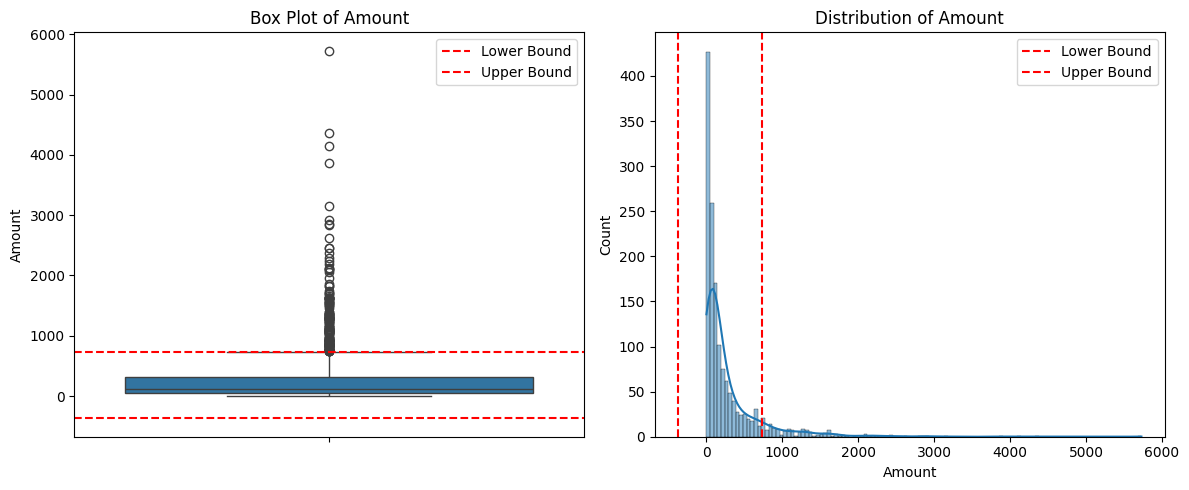

In [54]:
# Merge datasets
merged_data = pd.merge(order_details, orders, on='Order ID', how='inner')
print(f"Merged data shape: {merged_data.shape}")

# Function to detect outliers using IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Function to visualize outliers
def plot_outliers(df, column, lower_bound, upper_bound):
    plt.figure(figsize=(12, 5))
    
    # Box plot
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')
    plt.axhline(y=lower_bound, color='r', linestyle='--', label='Lower Bound')
    plt.axhline(y=upper_bound, color='r', linestyle='--', label='Upper Bound')
    plt.legend()
    
    # Histogram
    plt.subplot(1, 2, 2)
    sns.histplot(df[column], kde=True)
    plt.axvline(x=lower_bound, color='r', linestyle='--', label='Lower Bound')
    plt.axvline(x=upper_bound, color='r', linestyle='--', label='Upper Bound')
    plt.title(f'Distribution of {column}')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Now perform outlier detection
column = 'Amount'
outliers, lower_bound, upper_bound = detect_outliers_iqr(merged_data, column)

print(f"----- Outlier Analysis for {column} -----")
print(f"Lower bound: {lower_bound:.2f}")
print(f"Upper bound: {upper_bound:.2f}")
print(f"Number of outliers detected: {len(outliers)}")
print(f"Percentage of outliers: {(len(outliers) / len(merged_data)) * 100:.2f}%")

if len(outliers) > 0:
    print("\nSample outliers:")
    print(outliers[['Order ID', column]].head())

# Visualize outliers
plot_outliers(merged_data, column, lower_bound, upper_bound)

#### Amount - Handle outliers and compare results

----- After capping outliers in Amount -----
Original range: [4.00, 5729.00]
Capped range: [4.00, 737.50]


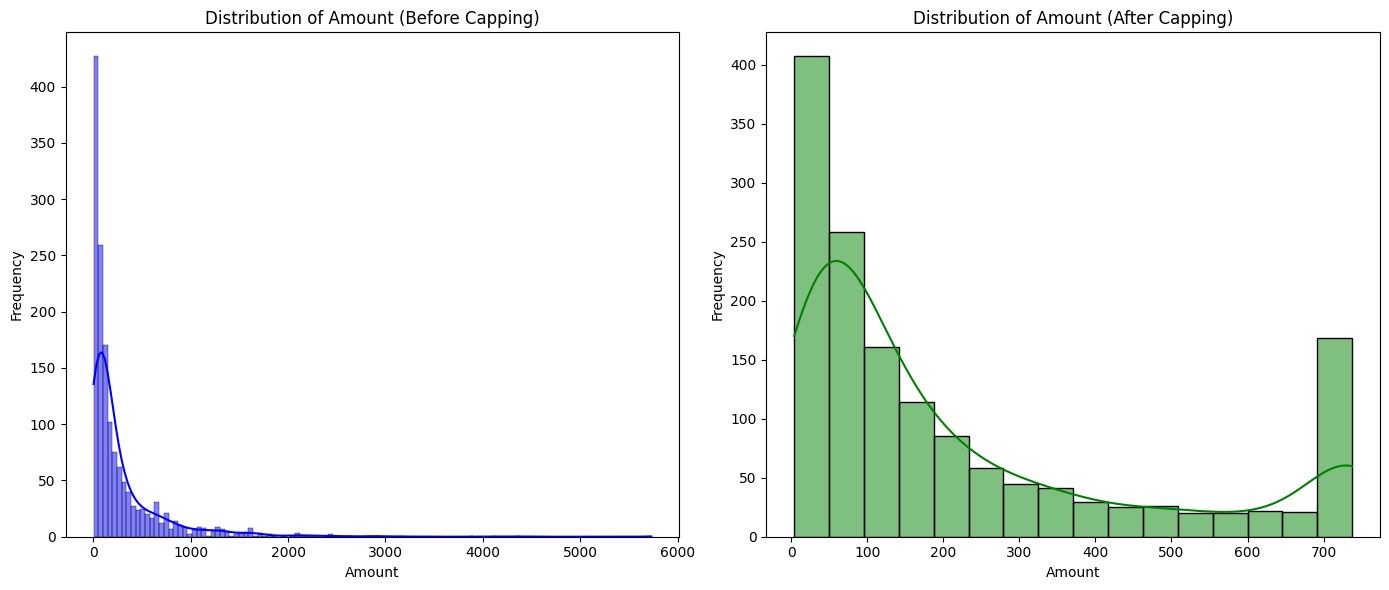

In [56]:
# Function to handle outliers using capping method
def cap_outliers(df, column, lower_bound, upper_bound):
    df_capped = df.copy()
    df_capped[column] = df_capped[column].clip(lower=lower_bound, upper=upper_bound)
    return df_capped

# Handle outliers in Amount using capping
merged_data_capped = cap_outliers(merged_data, 'Amount', lower_bound, upper_bound)

print(f"----- After capping outliers in Amount -----")
print(f"Original range: [{merged_data['Amount'].min():.2f}, {merged_data['Amount'].max():.2f}]")
print(f"Capped range: [{merged_data_capped['Amount'].min():.2f}, {merged_data_capped['Amount'].max():.2f}]")

# Compare distributions before and after capping
plt.figure(figsize=(14, 6))

# Before capping
plt.subplot(1, 2, 1)
sns.histplot(merged_data['Amount'], kde=True, color='blue')
plt.title('Distribution of Amount (Before Capping)')
plt.xlabel('Amount')
plt.ylabel('Frequency')

# After capping
plt.subplot(1, 2, 2)
sns.histplot(merged_data_capped['Amount'], kde=True, color='green')
plt.title('Distribution of Amount (After Capping)')
plt.xlabel('Amount')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#### Profit - Detect outliers and visualize

----- After capping outliers in Profit -----
Original range: [-1981.00, 1698.00]
Capped range: [-80.12, 108.88]


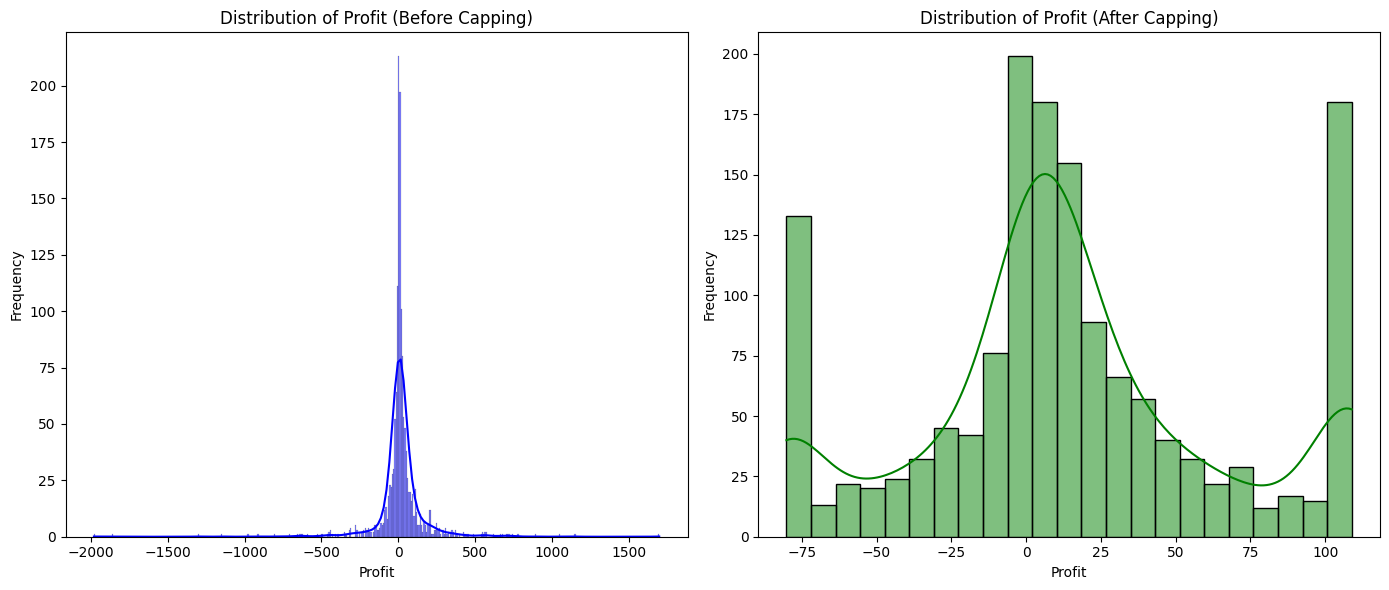

In [60]:
# Handle outliers in Profit using capping
merged_data_capped = cap_outliers(merged_data_capped, 'Profit', lower_bound, upper_bound)

print(f"----- After capping outliers in Profit -----")
print(f"Original range: [{merged_data['Profit'].min():.2f}, {merged_data['Profit'].max():.2f}]")
print(f"Capped range: [{merged_data_capped['Profit'].min():.2f}, {merged_data_capped['Profit'].max():.2f}]")

# Compare distributions before and after capping
compare_distributions(merged_data, merged_data_capped, 'Profit')

#### Profit - Handle outliers and compare results

----- Outlier Analysis for Profit -----
Lower bound: -80.12
Upper bound: 108.88
Number of outliers detected: 291
Percentage of outliers: 19.40%

Sample outliers:
  Order ID  Profit
0  B-25601 -1148.0
4  B-25602  -111.0
5  B-25602  -272.0
6  B-25602  1151.0
7  B-25602   212.0


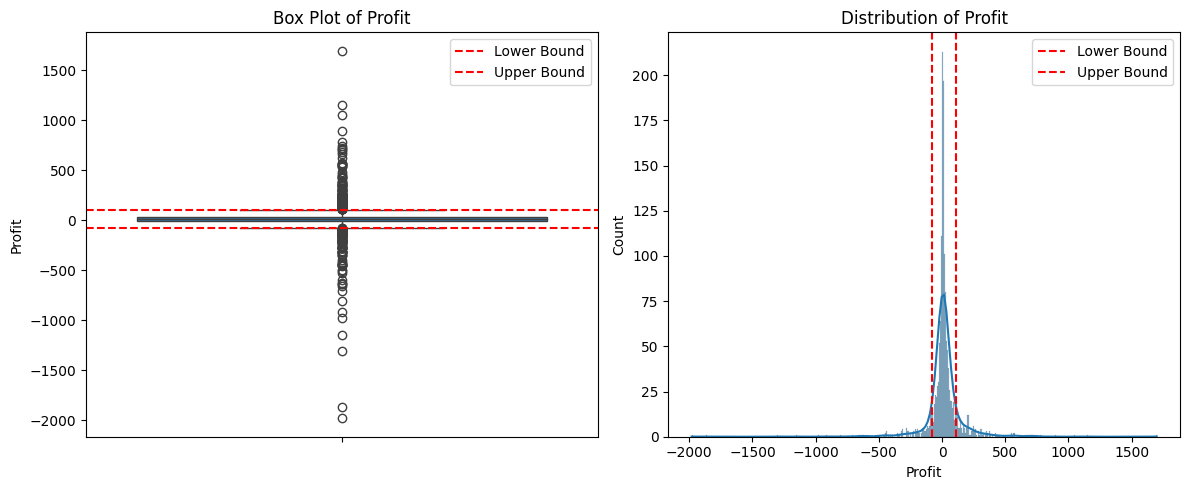

In [61]:
# Detect and visualize outliers in Profit
column = 'Profit'
outliers, lower_bound, upper_bound = detect_outliers_iqr(merged_data, column)

print(f"----- Outlier Analysis for {column} -----")
print(f"Lower bound: {lower_bound:.2f}")
print(f"Upper bound: {upper_bound:.2f}")
print(f"Number of outliers detected: {len(outliers)}")
print(f"Percentage of outliers: {(len(outliers) / len(merged_data)) * 100:.2f}%")

if len(outliers) > 0:
    print("\nSample outliers:")
    print(outliers[['Order ID', column]].head())

# Visualize outliers
plot_outliers(merged_data, column, lower_bound, upper_bound)

#### Quantity - Detect outliers and visualize

----- Outlier Analysis for Quantity -----
Lower bound: -2.50
Upper bound: 9.50
Number of outliers detected: 23
Percentage of outliers: 1.53%

Sample outliers:
    Order ID  Quantity
91   B-25640        13
94   B-25642        11
191  B-25662        11
237  B-25682        11
402  B-25745        11


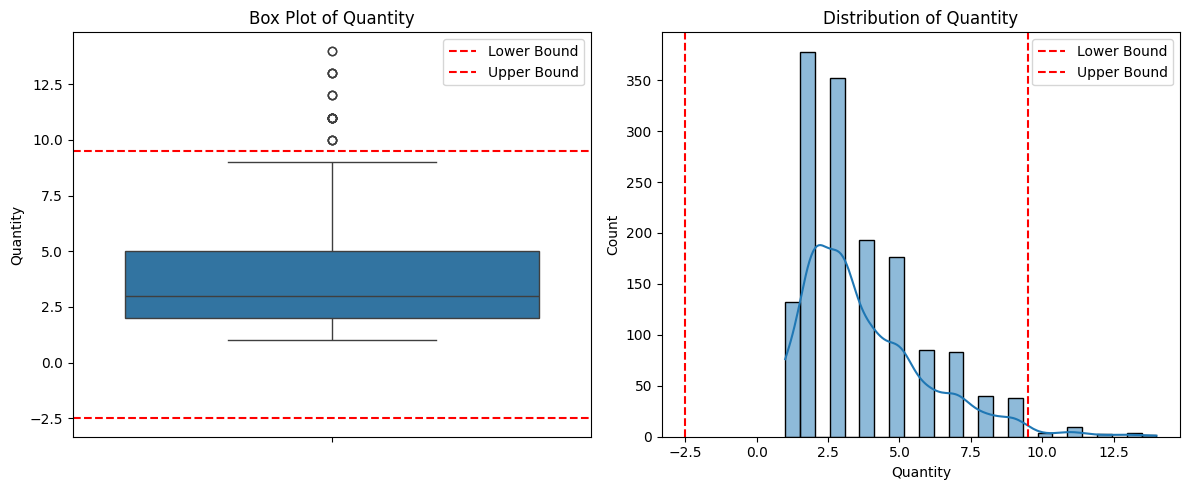

In [62]:
# Detect and visualize outliers in Quantity
column = 'Quantity'
outliers, lower_bound, upper_bound = detect_outliers_iqr(merged_data, column)

print(f"----- Outlier Analysis for {column} -----")
print(f"Lower bound: {lower_bound:.2f}")
print(f"Upper bound: {upper_bound:.2f}")
print(f"Number of outliers detected: {len(outliers)}")
print(f"Percentage of outliers: {(len(outliers) / len(merged_data)) * 100:.2f}%")

if len(outliers) > 0:
    print("\nSample outliers:")
    print(outliers[['Order ID', column]].head())

# Visualize outliers
plot_outliers(merged_data, column, lower_bound, upper_bound)

#### Quantity - Handle outliers and compare results

----- After capping outliers in Quantity -----
Original range: [1.00, 14.00]
Capped range: [1.00, 9.50]


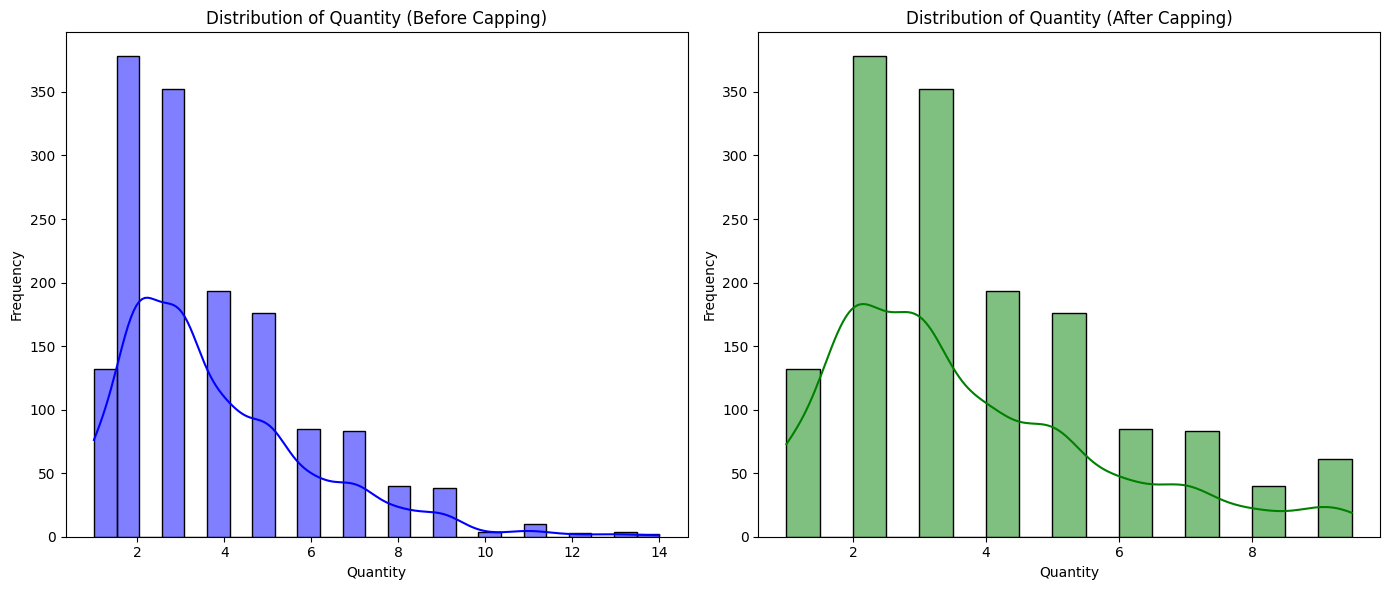

In [63]:
# Handle outliers in Quantity using capping
merged_data_capped = cap_outliers(merged_data_capped, 'Quantity', lower_bound, upper_bound)

print(f"----- After capping outliers in Quantity -----")
print(f"Original range: [{merged_data['Quantity'].min():.2f}, {merged_data['Quantity'].max():.2f}]")
print(f"Capped range: [{merged_data_capped['Quantity'].min():.2f}, {merged_data_capped['Quantity'].max():.2f}]")

# Compare distributions before and after capping
compare_distributions(merged_data, merged_data_capped, 'Quantity')

#### Save the cleaned data

In [64]:
# Save the capped data for further analysis
merged_data_capped.to_csv('Sales_Data_No_Outliers.csv', index=False)
print("Cleaned data without outliers saved to 'Sales_Data_No_Outliers.csv'")

# Summary statistics before and after outlier handling
print("\n----- Summary Statistics Comparison -----")
print("\nBefore outlier handling:")
print(merged_data[['Amount', 'Profit', 'Quantity']].describe())

print("\nAfter outlier handling:")
print(merged_data_capped[['Amount', 'Profit', 'Quantity']].describe())

Cleaned data without outliers saved to 'Sales_Data_No_Outliers.csv'

----- Summary Statistics Comparison -----

Before outlier handling:
            Amount       Profit     Quantity
count  1500.000000  1500.000000  1500.000000
mean    287.668000    15.970000     3.743333
std     461.050488   169.140565     2.184942
min       4.000000 -1981.000000     1.000000
25%      45.000000    -9.250000     2.000000
50%     118.000000     9.000000     3.000000
75%     322.000000    38.000000     5.000000
max    5729.000000  1698.000000    14.000000

After outlier handling:
            Amount       Profit     Quantity
count  1500.000000  1500.000000  1500.000000
mean    223.904333    14.131750     3.711667
std     238.199132    51.674722     2.078520
min       4.000000   -80.125000     1.000000
25%      45.000000    -9.250000     2.000000
50%     118.000000     9.000000     3.000000
75%     322.000000    38.000000     5.000000
max     737.500000   108.875000     9.500000


#### This cleaned dataset contains the merged data from the "List of Orders" and "Order Details" datasets after outlier treatment

## Exploratory Data Analysis

### Pivot Tables

## Regional Sales Performance Analysis - Preparatory Data Tables

### State-Level Performance Summary

In [66]:
# Create comprehensive state-level summary
state_performance = merged_data.groupby('State').agg({
    'Amount': 'sum',
    'Profit': 'sum',
    'Order ID': pd.Series.nunique,
    'CustomerName': pd.Series.nunique
}).reset_index()

# Calculate derived metrics
state_performance.rename(columns={
    'Order ID': 'Number of Orders',
    'CustomerName': 'Number of Customers'
}, inplace=True)
state_performance['Profit Margin (%)'] = (state_performance['Profit'] / state_performance['Amount']) * 100
state_performance['Average Order Value'] = state_performance['Amount'] / state_performance['Number of Orders']
state_performance['Orders per Customer'] = state_performance['Number of Orders'] / state_performance['Number of Customers']

# Sort by sales amount and display
state_performance_sorted = state_performance.sort_values('Amount', ascending=False)
print("State Performance Summary (Sorted by Sales):")
print(state_performance_sorted)

State Performance Summary (Sorted by Sales):
                State    Amount  Profit  Number of Orders  \
10     Madhya Pradesh  105140.0  5551.0               101   
11        Maharashtra   95348.0  6176.0                90   
2               Delhi   22531.0  2987.0                22   
17      Uttar Pradesh   22359.0  3237.0                22   
14          Rajasthan   21149.0  1257.0                32   
4             Gujarat   21058.0   465.0                27   
13             Punjab   16786.0  -609.0                25   
8           Karnataka   15058.0   645.0                21   
18        West Bengal   14086.0  2500.0                22   
9             Kerala    13459.0  1871.0                16   
0      Andhra Pradesh   13256.0  -496.0                15   
1               Bihar   12943.0  -321.0                16   
12           Nagaland   11903.0   148.0                15   
7   Jammu and Kashmir   10829.0     8.0                14   
5             Haryana    8863.0  1325.0 

### City-Level Performance for Top States

In [67]:
# Get the top 3 states by sales
top_states = state_performance_sorted.head(3)['State'].tolist()
print(f"Analyzing cities in top 3 states: {', '.join(top_states)}")

# Create city-level summary for top states
city_performance = merged_data[merged_data['State'].isin(top_states)].groupby(['State', 'City']).agg({
    'Amount': 'sum',
    'Profit': 'sum',
    'Order ID': pd.Series.nunique
}).reset_index()

# Calculate profit margin
city_performance.rename(columns={'Order ID': 'Number of Orders'}, inplace=True)
city_performance['Profit Margin (%)'] = (city_performance['Profit'] / city_performance['Amount']) * 100

# Sort and display
city_performance_sorted = city_performance.sort_values(['State', 'Amount'], ascending=[True, False])
print("\nCity Performance in Top 3 States:")
for state in top_states:
    print(f"\n{state} Cities:")
    state_cities = city_performance_sorted[city_performance_sorted['State'] == state]
    print(state_cities[['City', 'Amount', 'Profit', 'Profit Margin (%)', 'Number of Orders']])

Analyzing cities in top 3 states: Madhya Pradesh, Maharashtra, Delhi

City Performance in Top 3 States:

Madhya Pradesh Cities:
     City   Amount  Profit  Profit Margin (%)  Number of Orders
3  Indore  79069.0  4159.0           5.259963                76
1  Bhopal  23583.0   871.0           3.693338                22
2   Delhi   2488.0   521.0          20.940514                 3

Maharashtra Cities:
     City   Amount  Profit  Profit Margin (%)  Number of Orders
4  Mumbai  61867.0  1637.0           2.645999                68
5    Pune  33481.0  4539.0          13.556943                22

Delhi Cities:
    City   Amount  Profit  Profit Margin (%)  Number of Orders
0  Delhi  22531.0  2987.0           13.25729                22


## Regional Sales Performance Analysis - Preparatory Data Tables

In [117]:
# Create comprehensive state-level summary
state_performance = merged_data.groupby('State').agg({
    'Amount': 'sum',
    'Profit': 'sum',
    'Order ID': pd.Series.nunique,
    'CustomerName': pd.Series.nunique
}).reset_index()

# Calculate derived metrics
state_performance.rename(columns={
    'Order ID': 'Number of Orders',
    'CustomerName': 'Number of Customers'
}, inplace=True)
state_performance['Profit Margin (%)'] = (state_performance['Profit'] / state_performance['Amount']) * 100
state_performance['Average Order Value'] = state_performance['Amount'] / state_performance['Number of Orders']
state_performance['Orders per Customer'] = state_performance['Number of Orders'] / state_performance['Number of Customers']

# Sort by sales amount and display
state_performance_sorted = state_performance.sort_values('Amount', ascending=False)
print("State Performance Summary (Sorted by Sales):")
print(state_performance_sorted)

State Performance Summary (Sorted by Sales):
                State    Amount  Profit  Number of Orders  \
10     Madhya Pradesh  105140.0  5551.0               101   
11        Maharashtra   95348.0  6176.0                90   
2               Delhi   22531.0  2987.0                22   
17      Uttar Pradesh   22359.0  3237.0                22   
14          Rajasthan   21149.0  1257.0                32   
4             Gujarat   21058.0   465.0                27   
13             Punjab   16786.0  -609.0                25   
8           Karnataka   15058.0   645.0                21   
18        West Bengal   14086.0  2500.0                22   
9             Kerala    13459.0  1871.0                16   
0      Andhra Pradesh   13256.0  -496.0                15   
1               Bihar   12943.0  -321.0                16   
12           Nagaland   11903.0   148.0                15   
7   Jammu and Kashmir   10829.0     8.0                14   
5             Haryana    8863.0  1325.0 

## Product Category Dynamics - Preparatory Data Tables

### Category Performance Summary

In [69]:
# Create comprehensive category summary
category_performance = merged_data.groupby('Category').agg({
    'Amount': 'sum',
    'Profit': 'sum',
    'Order ID': pd.Series.nunique,
    'CustomerName': pd.Series.nunique,
    'Sub-Category': lambda x: len(x.unique())
}).reset_index()

# Calculate derived metrics
category_performance.rename(columns={
    'Order ID': 'Number of Orders',
    'CustomerName': 'Number of Customers',
    'Sub-Category': 'Number of Sub-Categories'
}, inplace=True)
category_performance['Profit Margin (%)'] = (category_performance['Profit'] / category_performance['Amount']) * 100
category_performance['Average Order Value'] = category_performance['Amount'] / category_performance['Number of Orders']

# Sort by sales amount and display
category_sorted = category_performance.sort_values('Amount', ascending=False)
print("Category Performance Summary (Sorted by Sales):")
print(category_sorted)

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
Category Performance Summary (Sorted by Sales):
      Category    Amount   Profit  Number of Orders  Number of Customers  \
1  Electronics  165267.0  10494.0               204                  164   
0     Clothing  139054.0  11163.0               393                  276   
2    Furniture  127181.0   2298.0               186                  158   

   Number of Sub-Categories  Profit Margin (%)  Average Order Value  
1                         4           6.349725           810.132353  
0                         9           8.027817           353.826972  
2                         4           1.806874           683.768817  


### Category Performance by Region

In [70]:
# Create category performance by state pivot table
category_by_state = merged_data.groupby(['State', 'Category']).agg({
    'Amount': 'sum',
    'Profit': 'sum'
}).reset_index()

# Calculate profit margin
category_by_state['Profit Margin (%)'] = (category_by_state['Profit'] / category_by_state['Amount']) * 100

# Create a pivot table for easier analysis
sales_pivot = category_by_state.pivot_table(
    index='State', 
    columns='Category',
    values='Amount',
    aggfunc='sum',
    fill_value=0
)

# Create similar pivot for profit margin
margin_pivot = category_by_state.pivot_table(
    index='State', 
    columns='Category',
    values='Profit Margin (%)',
    aggfunc='mean',
    fill_value=0
)

print("Sales by State and Category:")
print(sales_pivot)

print("\nProfit Margin (%) by State and Category:")
print(margin_pivot)

Sales by State and Category:
Category           Clothing  Electronics  Furniture
State                                              
Andhra Pradesh       3244.0       4505.0     5507.0
Bihar                2963.0       7357.0     2623.0
Delhi                5884.0       5111.0    11536.0
Goa                  2385.0       2157.0     2163.0
Gujarat              7759.0       4981.0     8318.0
Haryana              2854.0       2584.0     3425.0
Himachal Pradesh     1337.0       4675.0     2654.0
Jammu and Kashmir    3483.0       3817.0     3529.0
Karnataka            5073.0       6049.0     3936.0
Kerala               6360.0       3029.0     4070.0
Madhya Pradesh      30566.0      40529.0    34045.0
Maharashtra         28542.0      42493.0    24313.0
Nagaland             4050.0       4069.0     3784.0
Punjab               8419.0       6129.0     2238.0
Rajasthan            6440.0       9443.0     5266.0
Sikkim               3139.0       1527.0      610.0
Tamil Nadu           1956.0       1

## Customer Purchasing Patterns - Preparatory Data Tables

### Customer Segmentation Summary

In [71]:
# Create customer-level metrics
customer_metrics = merged_data.groupby('CustomerName').agg({
    'Order ID': pd.Series.nunique,
    'Amount': 'sum',
    'Profit': 'sum',
    'Category': lambda x: len(x.unique())
}).reset_index()

customer_metrics.rename(columns={
    'Order ID': 'Number of Orders',
    'Category': 'Categories Purchased'
}, inplace=True)

customer_metrics['Average Order Value'] = customer_metrics['Amount'] / customer_metrics['Number of Orders']
customer_metrics['Profit per Customer'] = customer_metrics['Profit'] / customer_metrics['Amount'] * 100

# Create simplified RFM segments using order frequency and monetary value
# Define custom functions for segmentation
order_quantiles = customer_metrics['Number of Orders'].quantile([0.33, 0.67]).tolist()
amount_quantiles = customer_metrics['Amount'].quantile([0.33, 0.67]).tolist()

# Create frequency segments
def assign_frequency_segment(x):
    if x <= order_quantiles[0]:
        return 'Low'
    elif x <= order_quantiles[1]:
        return 'Medium'
    else:
        return 'High'
        
# Create monetary segments
def assign_monetary_segment(x):
    if x <= amount_quantiles[0]:
        return 'Low'
    elif x <= amount_quantiles[1]:
        return 'Medium'
    else:
        return 'High'

customer_metrics['Frequency Segment'] = customer_metrics['Number of Orders'].apply(assign_frequency_segment)
customer_metrics['Monetary Segment'] = customer_metrics['Amount'].apply(assign_monetary_segment)

# Create combined RFM segment
customer_metrics['Customer Segment'] = customer_metrics['Frequency Segment'] + '-' + customer_metrics['Monetary Segment']

# Display summary of customer segments
print("Customer Segment Distribution:")
print(customer_metrics['Customer Segment'].value_counts())

# Show summary statistics by segment
segment_summary = customer_metrics.groupby('Customer Segment').agg({
    'CustomerName': 'count',
    'Amount': 'sum',
    'Profit': 'sum',
    'Number of Orders': 'sum',
    'Categories Purchased': 'mean'
}).reset_index()

segment_summary.rename(columns={'CustomerName': 'Number of Customers'}, inplace=True)
segment_summary['Profit Margin (%)'] = segment_summary['Profit'] / segment_summary['Amount'] * 100
segment_summary = segment_summary.sort_values('Amount', ascending=False)

print("\nCustomer Segment Performance Summary:")
print(segment_summary)

Customer Segment Distribution:
Customer Segment
Low-Low        100
Low-Medium      80
High-High       61
Low-High        49
High-Medium     32
High-Low        10
Name: count, dtype: int64

Customer Segment Performance Summary:
  Customer Segment  Number of Customers    Amount   Profit  Number of Orders  \
0        High-High                   61  210215.0  17866.0               169   
3         Low-High                   49  120768.0   5909.0                49   
5       Low-Medium                   80   59192.0    776.0                80   
2      High-Medium                   32   27814.0   -797.0                81   
4          Low-Low                  100   11690.0    -36.0               100   
1         High-Low                   10    1823.0    237.0                21   

   Categories Purchased  Profit Margin (%)  
0              2.688525           8.498918  
3              2.346939           4.892852  
5              1.637500           1.310988  
2              2.000000         

## Target Achievement Framework - Preparatory Data Tables

### Target vs. Actual Comparison

In [72]:
# First ensure month information is properly formatted
if 'Month of Order Date' in sales_targets.columns:
    # Create month mapping
    month_mapping = {name: num for num, name in enumerate(calendar.month_name) if num > 0}
    # Convert month names to numbers for easier comparison
    sales_targets['Month'] = sales_targets['Month of Order Date'].map(month_mapping)

# Calculate actual sales by month and category
merged_data['Month'] = pd.to_datetime(merged_data['Order Date']).dt.month
actual_sales = merged_data.groupby(['Month', 'Category'])['Amount'].sum().reset_index()

# Merge with targets
target_vs_actual = pd.merge(
    actual_sales,
    sales_targets,
    on=['Month', 'Category'],
    how='outer'
).fillna(0)

# Rename columns for clarity
target_vs_actual.rename(columns={
    'Amount': 'Actual',
    'Target': 'Target'
}, inplace=True)

# Calculate achievement metrics
target_vs_actual['Achievement (%)'] = (target_vs_actual['Actual'] / target_vs_actual['Target']) * 100
target_vs_actual['Gap'] = target_vs_actual['Actual'] - target_vs_actual['Target']

# Create month name for readability
month_names = {i: name for i, name in enumerate(calendar.month_name) if i > 0}
target_vs_actual['Month Name'] = target_vs_actual['Month'].map(month_names)

# Sort by month and category
target_vs_actual = target_vs_actual.sort_values(['Month', 'Category'])

print("Monthly Target vs. Actual Performance:")
print(target_vs_actual[['Month Name', 'Category', 'Actual', 'Target', 'Achievement (%)', 'Gap']])

# Create summary by category
category_achievement = target_vs_actual.groupby('Category').agg({
    'Actual': 'sum',
    'Target': 'sum',
    'Gap': 'sum'
}).reset_index()

category_achievement['Achievement (%)'] = (category_achievement['Actual'] / category_achievement['Target']) * 100
category_achievement = category_achievement.sort_values('Achievement (%)', ascending=False)

print("\nCategory Target Achievement Summary:")
print(category_achievement)

Monthly Target vs. Actual Performance:
   Month Name     Category  Actual   Target  Achievement (%)      Gap
36        NaN     Clothing     0.0  12000.0              0.0 -12000.0
37        NaN     Clothing     0.0  12000.0              0.0 -12000.0
38        NaN     Clothing     0.0  12000.0              0.0 -12000.0
39        NaN     Clothing     0.0  14000.0              0.0 -14000.0
40        NaN     Clothing     0.0  14000.0              0.0 -14000.0
..        ...          ...     ...      ...              ...      ...
31   November  Electronics  5129.0      0.0              inf   5129.0
32   November    Furniture  3439.0      0.0              inf   3439.0
33   December     Clothing  3253.0      0.0              inf   3253.0
34   December  Electronics   417.0      0.0              inf    417.0
35   December    Furniture  2506.0      0.0              inf   2506.0

[72 rows x 6 columns]

Category Target Achievement Summary:
      Category    Actual    Target      Gap  Achievement (%)

## Visualisation

In [73]:
# Ensure plots display in the notebook
%matplotlib inline

## Regional Sales Performance Analysis

In [74]:
# Merge datasets for analysis
merged_data = pd.merge(order_details, orders, on='Order ID', how='inner')
print(f"Merged data shape: {merged_data.shape}")

Merged data shape: (1500, 10)


### Create state-level visualizations

In [75]:
# Aggregate sales by State
state_performance = merged_data.groupby('State').agg({
    'Amount': 'sum',
    'Profit': 'sum',
    'Order ID': pd.Series.nunique
}).reset_index()

state_performance.rename(columns={'Order ID': 'Number of Orders'}, inplace=True)
state_performance['Profit Margin (%)'] = (state_performance['Profit'] / state_performance['Amount']) * 100

# Sort by total sales amount
state_performance = state_performance.sort_values('Amount', ascending=False)

# Top 10 states by sales
top_states = state_performance.head(10)
print("Top 10 states by sales:")
print(top_states)

Top 10 states by sales:
             State    Amount  Profit  Number of Orders  Profit Margin (%)
10  Madhya Pradesh  105140.0  5551.0               101           5.279627
11     Maharashtra   95348.0  6176.0                90           6.477325
2            Delhi   22531.0  2987.0                22          13.257290
17   Uttar Pradesh   22359.0  3237.0                22          14.477392
14       Rajasthan   21149.0  1257.0                32           5.943543
4          Gujarat   21058.0   465.0                27           2.208187
13          Punjab   16786.0  -609.0                25          -3.628023
8        Karnataka   15058.0   645.0                21           4.283437
18     West Bengal   14086.0  2500.0                22          17.748119
9          Kerala    13459.0  1871.0                16          13.901479


### Total Sales by State (Top 10)

/var/folders/9m/f5jl8xnd4ls2_3ykntk1_rpm0000gn/T/ipykernel_17133/447819159.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sales_plot = sns.barplot(x='Amount', y='State', data=top_states, palette='viridis')


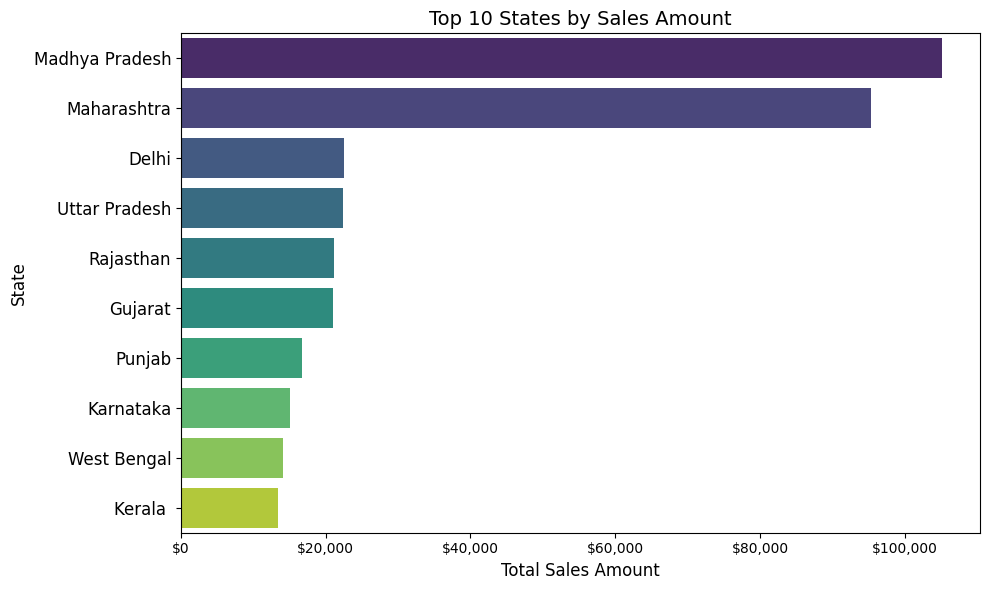

In [76]:
# Create a figure for Total Sales by State
plt.figure(figsize=(10, 6))
sales_plot = sns.barplot(x='Amount', y='State', data=top_states, palette='viridis')
plt.title('Top 10 States by Sales Amount', fontsize=14)
plt.xlabel('Total Sales Amount', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.tick_params(axis='y', labelsize=12)

# Format x-axis labels as currency
formatter = mtick.StrMethodFormatter('${x:,.0f}')
sales_plot.xaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

### Total Profit by State (Top 10)

/var/folders/9m/f5jl8xnd4ls2_3ykntk1_rpm0000gn/T/ipykernel_17133/2801697291.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  profit_plot = sns.barplot(x='Profit', y='State', data=top_states, palette='viridis')


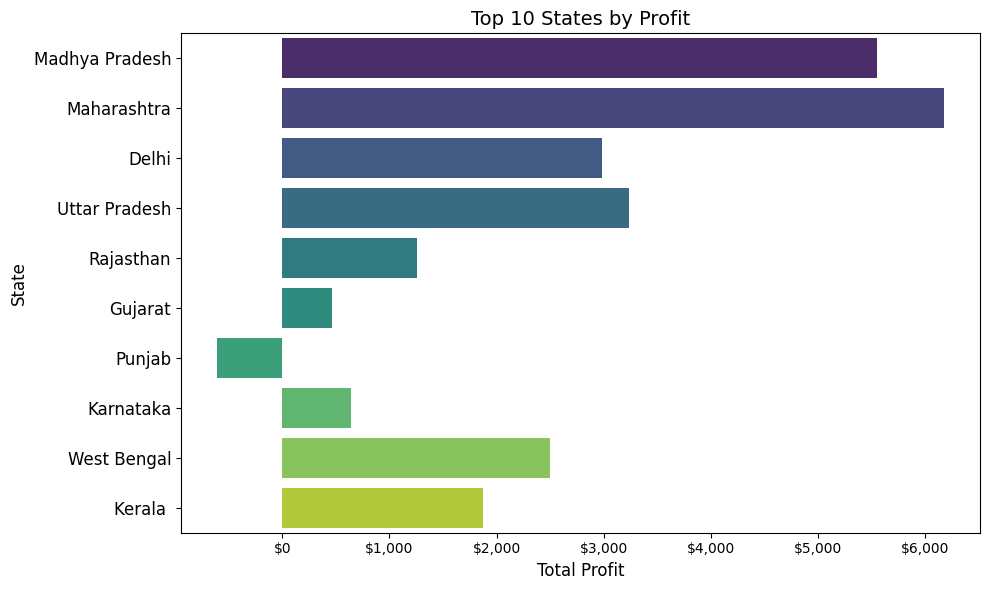

In [77]:
# Create a figure for Total Profit by State
plt.figure(figsize=(10,6))
profit_plot = sns.barplot(x='Profit', y='State', data=top_states, palette='viridis')
plt.title('Top 10 States by Profit', fontsize=14)
plt.xlabel('Total Profit', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.tick_params(axis='y', labelsize=12)

# Format x-axis labels as currency
profit_plot.xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

plt.tight_layout()
plt.show()

### Number of Orders by State (Top 10)

/var/folders/9m/f5jl8xnd4ls2_3ykntk1_rpm0000gn/T/ipykernel_17133/1215240240.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  orders_plot = sns.barplot(x='Number of Orders', y='State', data=top_states, palette='viridis')


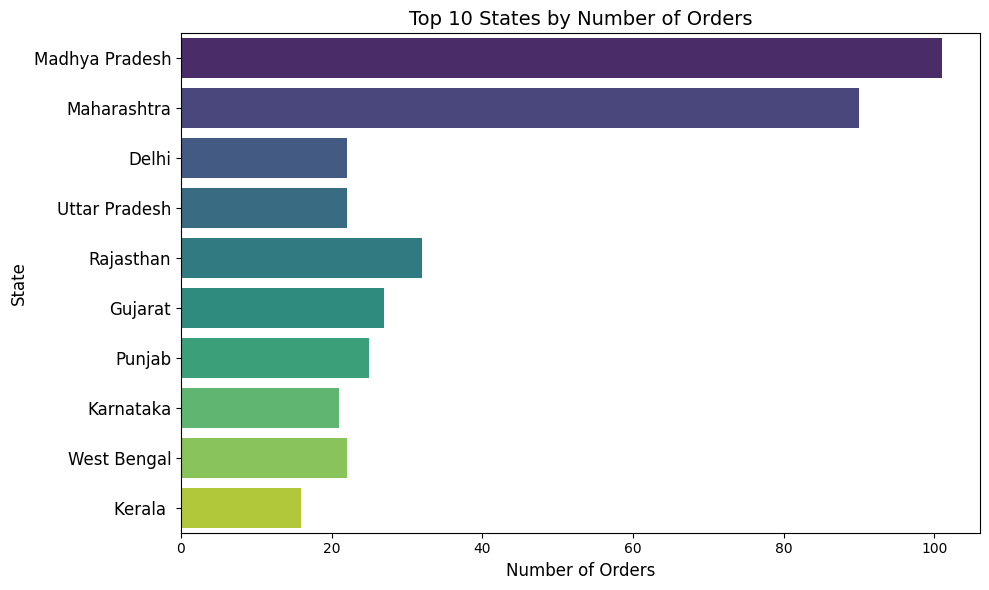

In [78]:
# Create a figure for Number of Orders by State
plt.figure(figsize=(10, 6))
orders_plot = sns.barplot(x='Number of Orders', y='State', data=top_states, palette='viridis')
plt.title('Top 10 States by Number of Orders', fontsize=14)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.show()

### Profit Margin by State (Top 10)

/var/folders/9m/f5jl8xnd4ls2_3ykntk1_rpm0000gn/T/ipykernel_17133/2754975068.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  margin_plot = sns.barplot(x='Profit Margin (%)', y='State', data=top_states, palette='viridis')


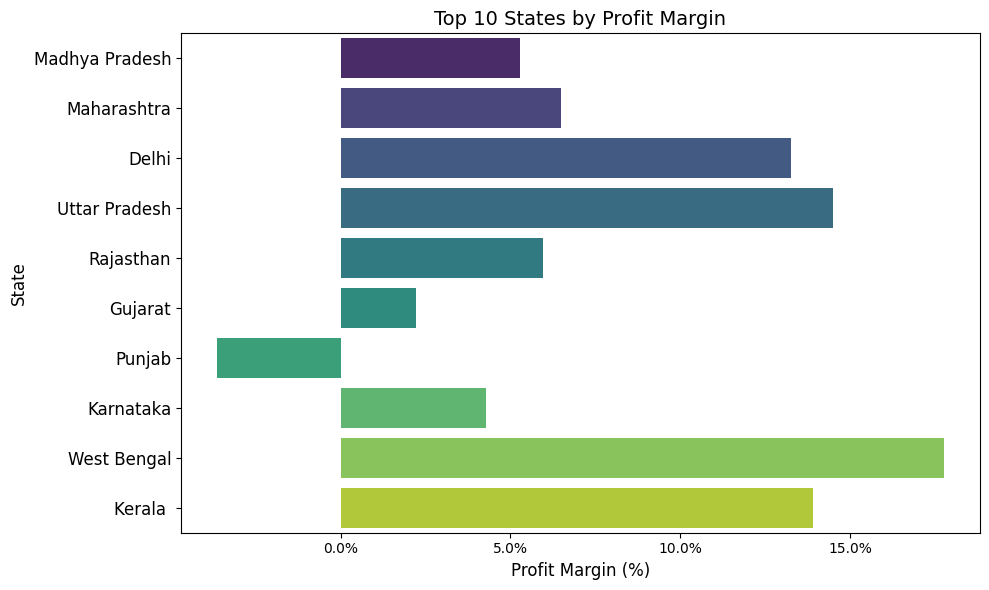

In [79]:
# Create a figure for Profit Margin by State
plt.figure(figsize=(10, 6))
margin_plot = sns.barplot(x='Profit Margin (%)', y='State', data=top_states, palette='viridis')
plt.title('Top 10 States by Profit Margin', fontsize=14)
plt.xlabel('Profit Margin (%)', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.tick_params(axis='y', labelsize=12)

# Format x-axis as percentage
margin_plot.xaxis.set_major_formatter(mtick.PercentFormatter())

plt.tight_layout()
plt.show()

### City-level analysis for top state

Top performing state: Madhya Pradesh
Cities in Madhya Pradesh sorted by sales amount:
     City   Amount   Profit  Number of Orders  Profit Margin (%)
2  Indore  59377.5  3879.25                76           6.533199
0  Bhopal  17896.0   379.25                22           2.119189
1   Delhi   1603.5   368.75                 3          22.996570


/var/folders/9m/f5jl8xnd4ls2_3ykntk1_rpm0000gn/T/ipykernel_17133/1460056684.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  margin_plot = sns.barplot(x='Amount', y='City', data=top_cities, palette='viridis')


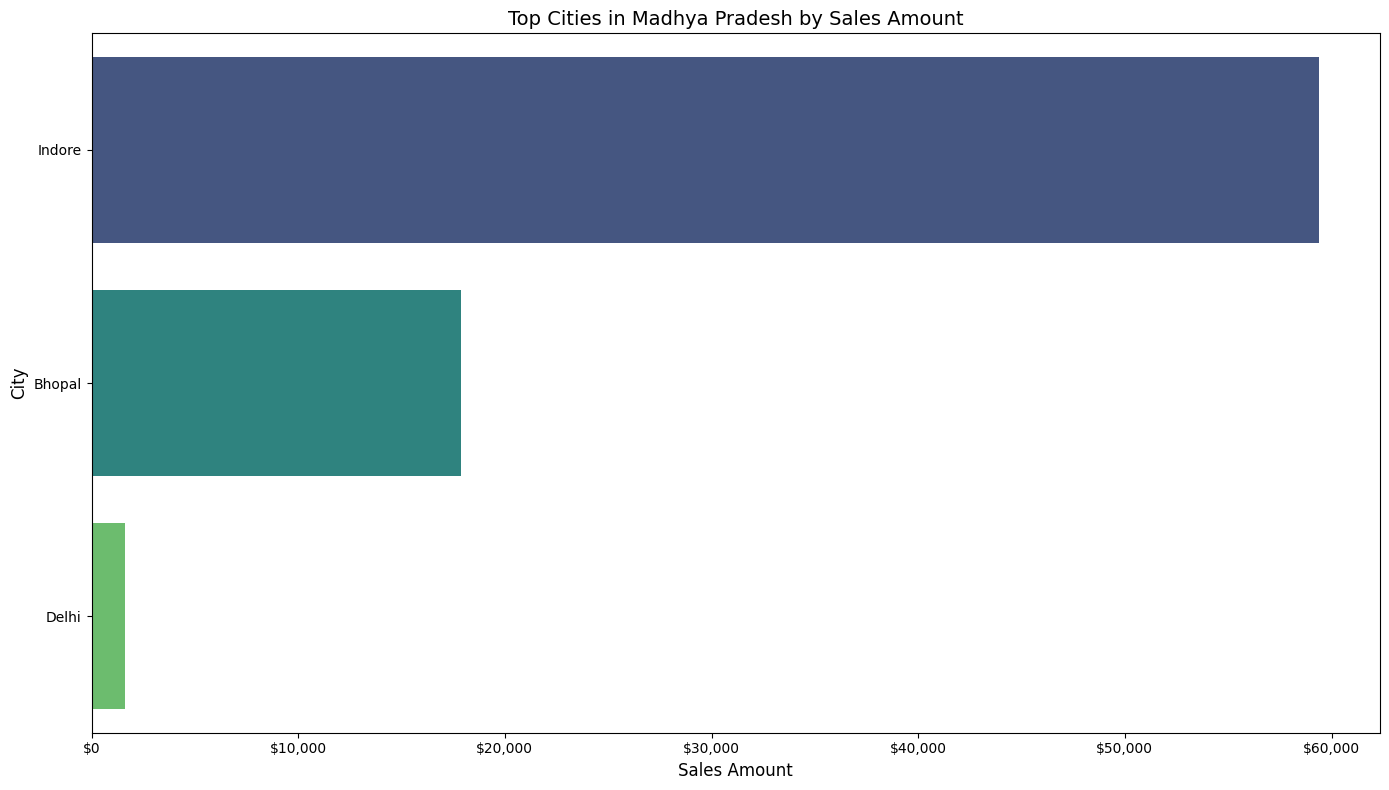

In [84]:
# Get the top-performing state
state_performance = merged_data_capped.groupby('State').agg({
    'Amount': 'sum',
    'Profit': 'sum',
    'Order ID': pd.Series.nunique
}).reset_index()

# Sort by Amount to find top state
state_performance = state_performance.sort_values('Amount', ascending=False)
top_state = state_performance.iloc[0]['State']
print(f"Top performing state: {top_state}")

# Get cities in top state
top_state_data = merged_data_capped[merged_data_capped['State'] == top_state]

# Aggregate by city
city_performance = top_state_data.groupby('City').agg({
    'Amount': 'sum',
    'Profit': 'sum',
    'Order ID': pd.Series.nunique
}).reset_index()

city_performance.rename(columns={'Order ID': 'Number of Orders'}, inplace=True)
city_performance['Profit Margin (%)'] = (city_performance['Profit'] / city_performance['Amount']) * 100

# Sort by Amount and get top cities
city_performance = city_performance.sort_values('Amount', ascending=False)
top_cities = city_performance.head(10)  # Get top 10 or fewer if there aren't that many

print(f"Cities in {top_state} sorted by sales amount:")
print(top_cities)

# Now plot the cities
plt.figure(figsize=(14, 8))
margin_plot = sns.barplot(x='Amount', y='City', data=top_cities, palette='viridis')
plt.title(f'Top Cities in {top_state} by Sales Amount', fontsize=14)
plt.xlabel('Sales Amount', fontsize=12)
plt.ylabel('City', fontsize=12)

# Format x-axis as currency
formatter = mtick.StrMethodFormatter('${x:,.0f}')
margin_plot.xaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

/var/folders/9m/f5jl8xnd4ls2_3ykntk1_rpm0000gn/T/ipykernel_17133/2780271341.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  profit_plot = sns.barplot(x='Profit', y='City', data=top_cities, palette='viridis')


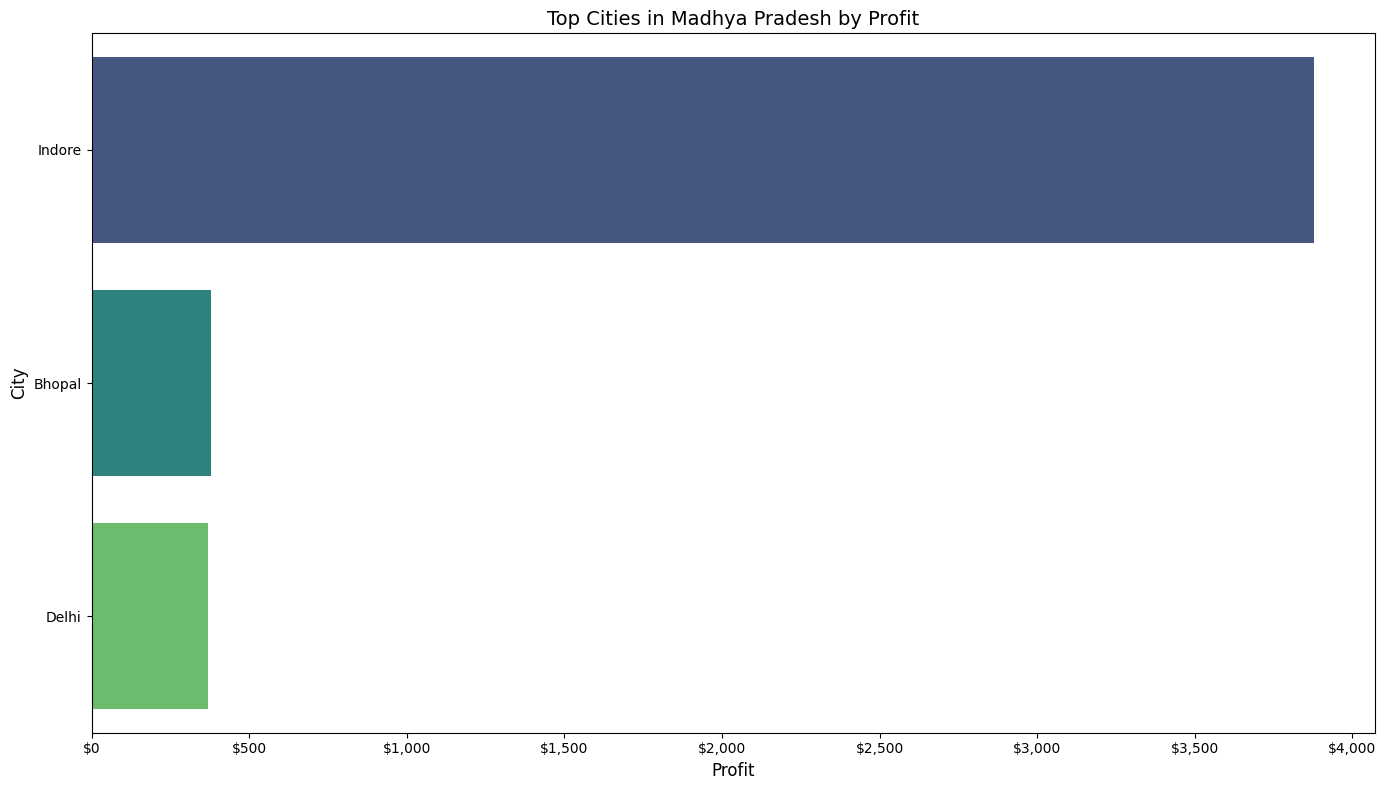

In [85]:
plt.figure(figsize=(14, 8))
profit_plot = sns.barplot(x='Profit', y='City', data=top_cities, palette='viridis')
plt.title(f'Top Cities in {top_state} by Profit', fontsize=14)
plt.xlabel('Profit', fontsize=12)
plt.ylabel('City', fontsize=12)

# Format x-axis as currency
formatter = mtick.StrMethodFormatter('${x:,.0f}')
profit_plot.xaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

/var/folders/9m/f5jl8xnd4ls2_3ykntk1_rpm0000gn/T/ipykernel_17133/3540061506.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  margin_plot = sns.barplot(x='Profit Margin (%)', y='City', data=top_cities, palette='viridis')


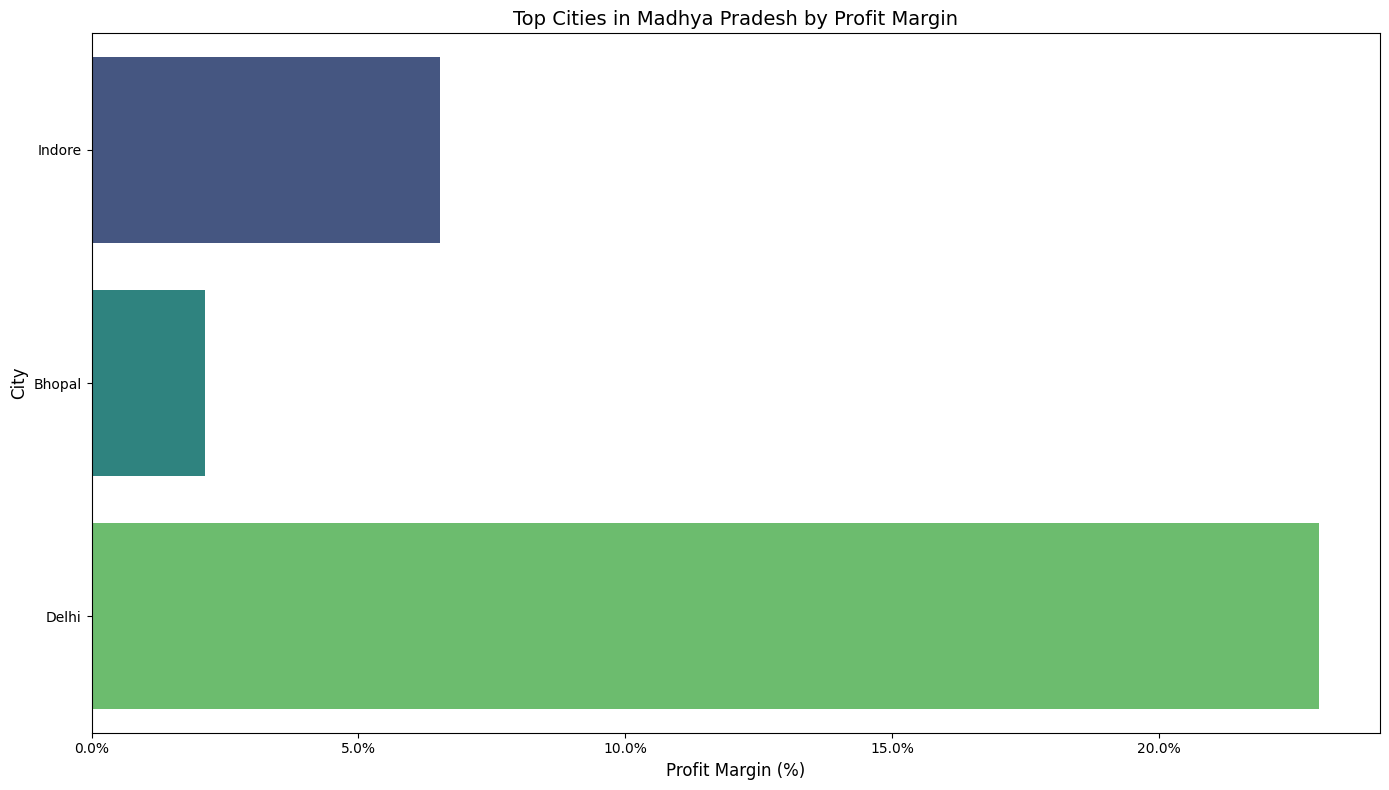

In [86]:
plt.figure(figsize=(14, 8))
margin_plot = sns.barplot(x='Profit Margin (%)', y='City', data=top_cities, palette='viridis')
plt.title(f'Top Cities in {top_state} by Profit Margin', fontsize=14)
plt.xlabel('Profit Margin (%)', fontsize=12)
plt.ylabel('City', fontsize=12)

# Format x-axis as percentage
margin_plot.xaxis.set_major_formatter(mtick.PercentFormatter())

plt.tight_layout()
plt.show()

## Product Category Dynamics

### Aggregate category performance data

In [87]:
# Aggregate performance by category
category_performance = merged_data.groupby('Category').agg({
    'Amount': 'sum',
    'Profit': 'sum',
    'Order ID': pd.Series.nunique,
    'Sub-Category': pd.Series.nunique
}).reset_index()

category_performance.rename(columns={
    'Order ID': 'Number of Orders',
    'Sub-Category': 'Number of Sub-Categories'
}, inplace=True)

category_performance['Profit Margin (%)'] = (category_performance['Profit'] / category_performance['Amount']) * 100
category_performance['Avg Order Value'] = category_performance['Amount'] / category_performance['Number of Orders']

# Sort by total sales
category_performance = category_performance.sort_values('Amount', ascending=False)

print("Category Performance Summary:")
print(category_performance)

Category Performance Summary:
      Category    Amount   Profit  Number of Orders  Number of Sub-Categories  \
1  Electronics  165267.0  10494.0               204                         4   
0     Clothing  139054.0  11163.0               393                         9   
2    Furniture  127181.0   2298.0               186                         4   

   Profit Margin (%)  Avg Order Value  
1           6.349725       810.132353  
0           8.027817       353.826972  
2           1.806874       683.768817  


### Total Sales by Category

/var/folders/9m/f5jl8xnd4ls2_3ykntk1_rpm0000gn/T/ipykernel_17133/2338908212.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sales_plot = sns.barplot(x='Amount', y='Category', data=category_performance, palette='viridis')


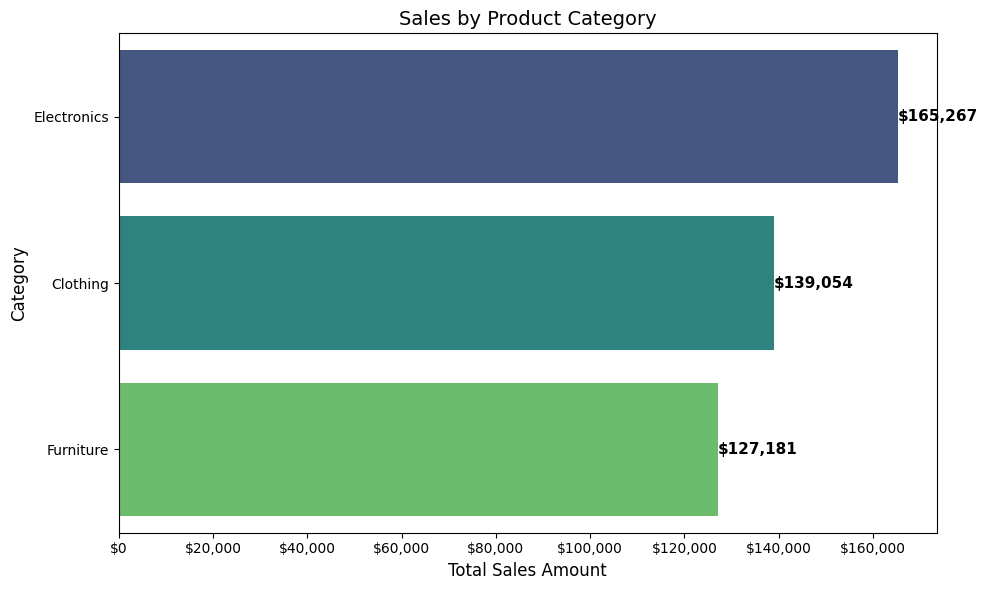

In [88]:
plt.figure(figsize=(10, 6))
sales_plot = sns.barplot(x='Amount', y='Category', data=category_performance, palette='viridis')
plt.title('Sales by Product Category', fontsize=14)
plt.xlabel('Total Sales Amount', fontsize=12)
plt.ylabel('Category', fontsize=12)

# Format x-axis as currency
formatter = mtick.StrMethodFormatter('${x:,.0f}')
sales_plot.xaxis.set_major_formatter(formatter)

# Add value labels
for p in sales_plot.patches:
    sales_plot.annotate(f'${p.get_width():,.0f}', 
                (p.get_width(), p.get_y() + p.get_height()/2),
                ha = 'left', va = 'center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

### Total Profit by Category

/var/folders/9m/f5jl8xnd4ls2_3ykntk1_rpm0000gn/T/ipykernel_17133/2346179052.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  profit_plot = sns.barplot(x='Profit', y='Category', data=category_performance, palette='viridis')


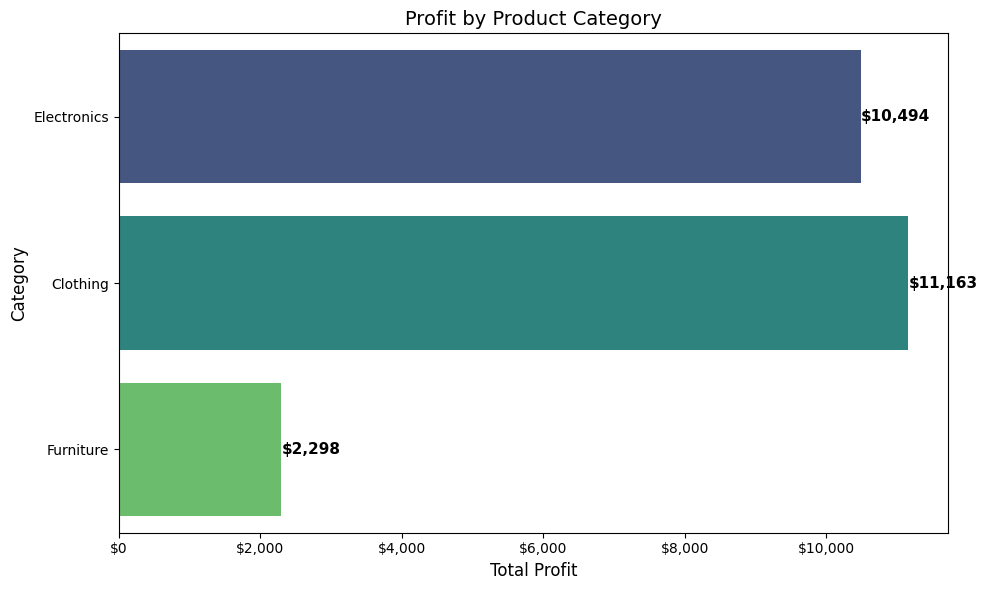

In [89]:
plt.figure(figsize=(10, 6))
profit_plot = sns.barplot(x='Profit', y='Category', data=category_performance, palette='viridis')
plt.title('Profit by Product Category', fontsize=14)
plt.xlabel('Total Profit', fontsize=12)
plt.ylabel('Category', fontsize=12)

# Format x-axis as currency
formatter = mtick.StrMethodFormatter('${x:,.0f}')
profit_plot.xaxis.set_major_formatter(formatter)

# Add value labels
for p in profit_plot.patches:
    profit_plot.annotate(f'${p.get_width():,.0f}', 
                (p.get_width(), p.get_y() + p.get_height()/2),
                ha = 'left', va = 'center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

### Profit Margin by Category

/var/folders/9m/f5jl8xnd4ls2_3ykntk1_rpm0000gn/T/ipykernel_17133/2303381533.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  margin_plot = sns.barplot(x='Profit Margin (%)', y='Category', data=category_performance, palette='viridis')


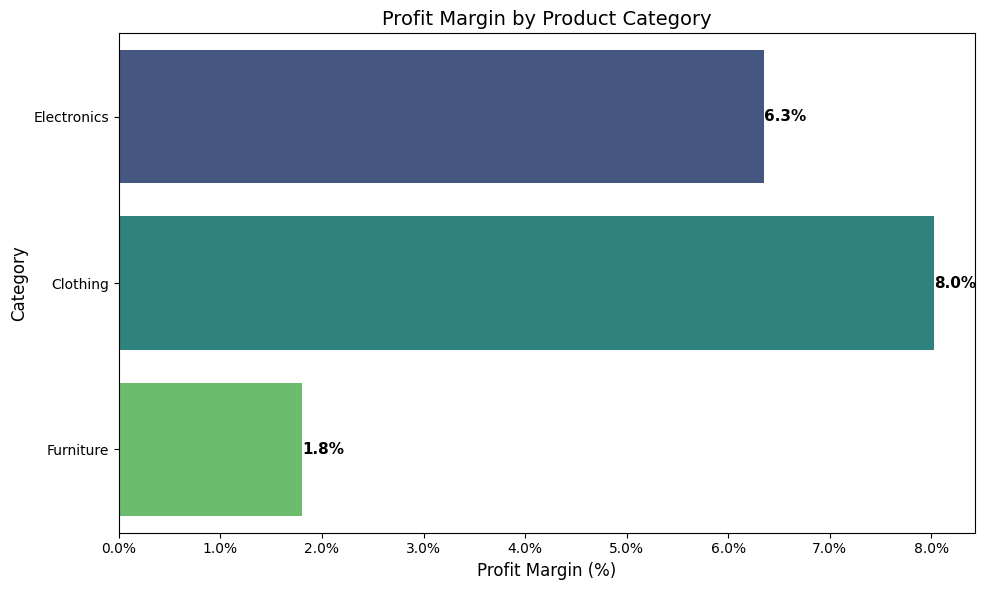

In [90]:
plt.figure(figsize=(10, 6))
margin_plot = sns.barplot(x='Profit Margin (%)', y='Category', data=category_performance, palette='viridis')
plt.title('Profit Margin by Product Category', fontsize=14)
plt.xlabel('Profit Margin (%)', fontsize=12)
plt.ylabel('Category', fontsize=12)

# Format x-axis as percentage
margin_plot.xaxis.set_major_formatter(mtick.PercentFormatter())

# Add value labels
for p in margin_plot.patches:
    margin_plot.annotate(f'{p.get_width():.1f}%', 
                (p.get_width(), p.get_y() + p.get_height()/2),
                ha = 'left', va = 'center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

### Category performance across regions (heatmap)

Top 5 states by sales: Madhya Pradesh, Maharashtra, Delhi, Uttar Pradesh, Rajasthan


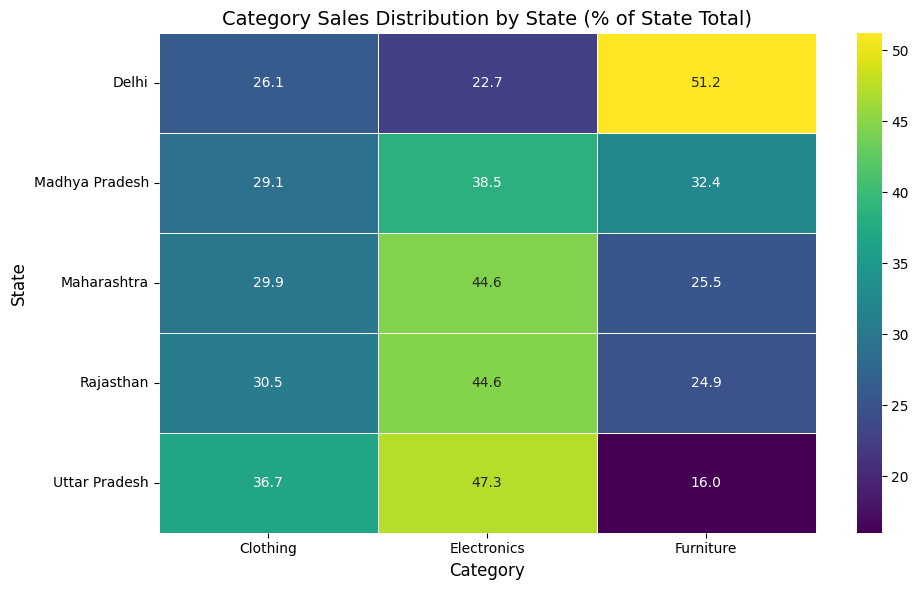

In [91]:
# Get top 5 states
top_states = merged_data.groupby('State')['Amount'].sum().nlargest(5).index.tolist()
print(f"Top 5 states by sales: {', '.join(top_states)}")

# Filter data for top states
region_category = merged_data[merged_data['State'].isin(top_states)].groupby(['State', 'Category']).agg({
    'Amount': 'sum'
}).reset_index()

# Pivot for heatmap
pivot_data = region_category.pivot(index='State', columns='Category', values='Amount')

# Normalize by state for fair comparison (percentage of state's total)
state_totals = pivot_data.sum(axis=1)
normalized_pivot = pivot_data.div(state_totals, axis=0) * 100

plt.figure(figsize=(10, 6))
sns.heatmap(normalized_pivot, annot=True, fmt='.1f', cmap='viridis', linewidths=.5)
plt.title('Category Sales Distribution by State (% of State Total)', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.tight_layout()
plt.show()

### Subcategory analysis for the top category

Detailed analysis for top-performing category: Electronics
Subcategory Performance:
       Sub-Category   Amount  Profit  Number of Orders  Profit Margin (%)
3          Printers  58252.0  5964.0                67          10.238275
2            Phones  46119.0  2207.0                71           4.785446
1  Electronic Games  39168.0 -1236.0                73          -3.155637
0       Accessories  21728.0  3559.0                65          16.379786


/var/folders/9m/f5jl8xnd4ls2_3ykntk1_rpm0000gn/T/ipykernel_17133/2998900817.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  subcat_plot = sns.barplot(x='Amount', y='Sub-Category', data=subcategory_performance, palette='viridis')


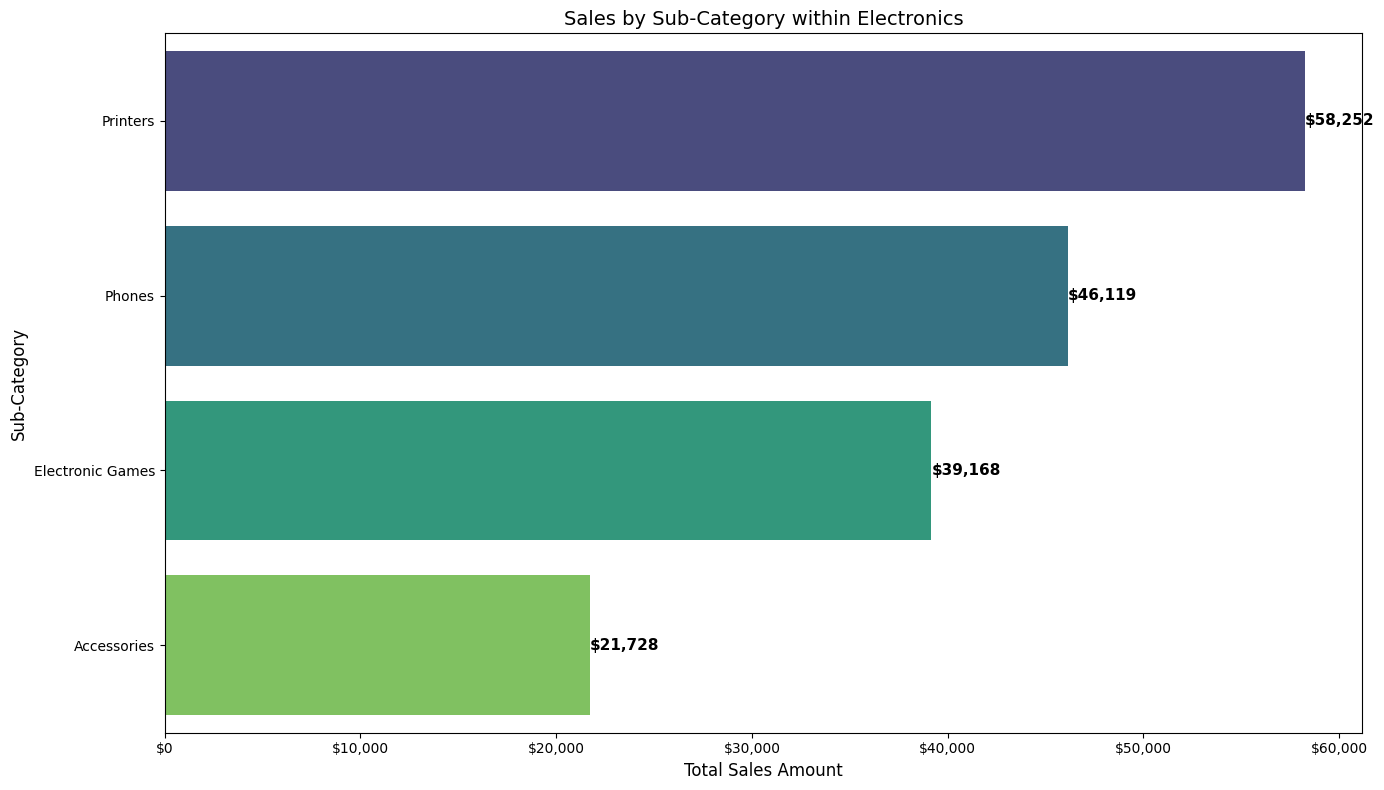

In [92]:
# Get the top-performing category
top_category = category_performance.iloc[0]['Category']
print(f"Detailed analysis for top-performing category: {top_category}")

# Filter data for top category
subcategory_performance = merged_data[merged_data['Category'] == top_category].groupby('Sub-Category').agg({
    'Amount': 'sum',
    'Profit': 'sum',
    'Order ID': pd.Series.nunique
}).reset_index()

subcategory_performance.rename(columns={'Order ID': 'Number of Orders'}, inplace=True)
subcategory_performance['Profit Margin (%)'] = (subcategory_performance['Profit'] / subcategory_performance['Amount']) * 100

# Sort by amount
subcategory_performance = subcategory_performance.sort_values('Amount', ascending=False)

print("Subcategory Performance:")
print(subcategory_performance)

plt.figure(figsize=(14, 8))
subcat_plot = sns.barplot(x='Amount', y='Sub-Category', data=subcategory_performance, palette='viridis')
plt.title(f'Sales by Sub-Category within {top_category}', fontsize=14)
plt.xlabel('Total Sales Amount', fontsize=12)
plt.ylabel('Sub-Category', fontsize=12)

# Format x-axis as currency
formatter = mtick.StrMethodFormatter('${x:,.0f}')
subcat_plot.xaxis.set_major_formatter(formatter)

# Add value labels
for p in subcat_plot.patches:
    subcat_plot.annotate(f'${p.get_width():,.0f}', 
                (p.get_width(), p.get_y() + p.get_height()/2),
                ha = 'left', va = 'center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

### Monthly sales trends by category (seasonality)

<Figure size 2000x1000 with 0 Axes>

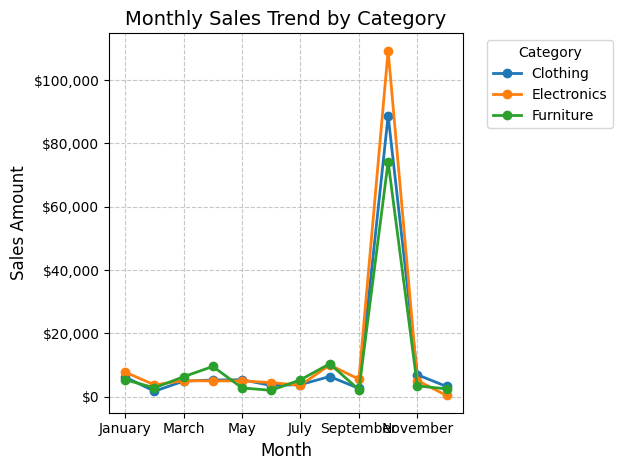

In [98]:
# Make sure Order Date is a datetime
merged_data['Order Date'] = pd.to_datetime(merged_data['Order Date'], errors='coerce')

# Extract month and year
merged_data['Month'] = merged_data['Order Date'].dt.month
merged_data['Month_Name'] = merged_data['Order Date'].dt.month_name()

# Group by month and category
monthly_category = merged_data.groupby(['Month', 'Month_Name', 'Category']).agg({
    'Amount': 'sum'
}).reset_index()

# Sort by month for proper ordering
monthly_category['Month_Name'] = pd.Categorical(
    monthly_category['Month_Name'], 
    categories=[month for month in calendar.month_name if month],  # Skip empty first entry
    ordered=True
)
monthly_category = monthly_category.sort_values(['Month', 'Category'])

# Pivot for line plot
pivot_monthly = monthly_category.pivot(index='Month_Name', columns='Category', values='Amount')

plt.figure(figsize=(20,10))
pivot_monthly.plot(marker='o', linewidth=2)
plt.title('Monthly Sales Trend by Category', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales Amount', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Format y-axis as currency
formatter = mtick.StrMethodFormatter('${x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

## Customer Purchasing Patterns

### Calculate customer metrics and create segments

In [99]:
# Calculate metrics per customer
customer_metrics = merged_data.groupby('CustomerName').agg({
    'Order ID': pd.Series.nunique,
    'Amount': 'sum',
    'Profit': 'sum',
    'Category': lambda x: len(x.unique())
}).reset_index()

customer_metrics.rename(columns={
    'Order ID': 'Number of Orders',
    'Category': 'Categories Purchased'
}, inplace=True)

customer_metrics['Average Order Value'] = customer_metrics['Amount'] / customer_metrics['Number of Orders']

# Print value counts to understand distribution
print("Order frequency distribution:")
print(customer_metrics['Number of Orders'].value_counts().sort_index())

print("\nAmount distribution quantiles:")
print(customer_metrics['Amount'].quantile([0.33, 0.67]))

# Create segments using custom logic instead of qcut
# For Order Frequency
order_quantiles = customer_metrics['Number of Orders'].quantile([0.33, 0.67]).tolist()
def assign_frequency_segment(x):
    if x <= order_quantiles[0]:
        return 'Low'
    elif x <= order_quantiles[1]:
        return 'Medium'
    else:
        return 'High'

customer_metrics['Order Frequency Segment'] = customer_metrics['Number of Orders'].apply(assign_frequency_segment)

# For Monetary Value
amount_quantiles = customer_metrics['Amount'].quantile([0.33, 0.67]).tolist()
def assign_monetary_segment(x):
    if x <= amount_quantiles[0]:
        return 'Low'
    elif x <= amount_quantiles[1]:
        return 'Medium'
    else:
        return 'High'

customer_metrics['Monetary Value Segment'] = customer_metrics['Amount'].apply(assign_monetary_segment)

print("\nSegment Distribution:")
print(customer_metrics['Order Frequency Segment'].value_counts())
print(customer_metrics['Monetary Value Segment'].value_counts())

Order frequency distribution:
Number of Orders
1    229
2     53
3     40
4      6
5      3
6      1
Name: count, dtype: int64

Amount distribution quantiles:
0.33     282.69
0.67    1394.01
Name: Amount, dtype: float64

Segment Distribution:
Order Frequency Segment
Low     229
High    103
Name: count, dtype: int64
Monetary Value Segment
Medium    112
Low       110
High      110
Name: count, dtype: int64


### Distribution of customers by order frequency

/var/folders/9m/f5jl8xnd4ls2_3ykntk1_rpm0000gn/T/ipykernel_17133/1382324840.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Segment', y='Count', data=order_freq_dist, palette='viridis')


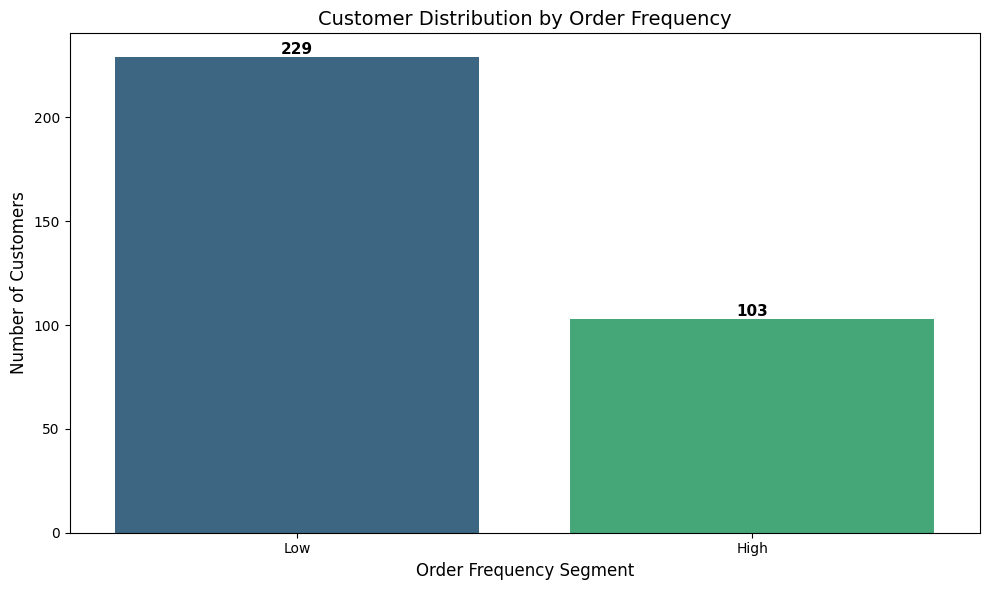

In [100]:
# Calculate segment distributions
order_freq_dist = customer_metrics['Order Frequency Segment'].value_counts().reset_index()
order_freq_dist.columns = ['Segment', 'Count']

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Segment', y='Count', data=order_freq_dist, palette='viridis')
plt.title('Customer Distribution by Order Frequency', fontsize=14)
plt.xlabel('Order Frequency Segment', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Add value labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha = 'center', va = 'bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

### Distribution of customers by monetary value

/var/folders/9m/f5jl8xnd4ls2_3ykntk1_rpm0000gn/T/ipykernel_17133/2431013118.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Segment', y='Count', data=monetary_dist, palette='viridis')


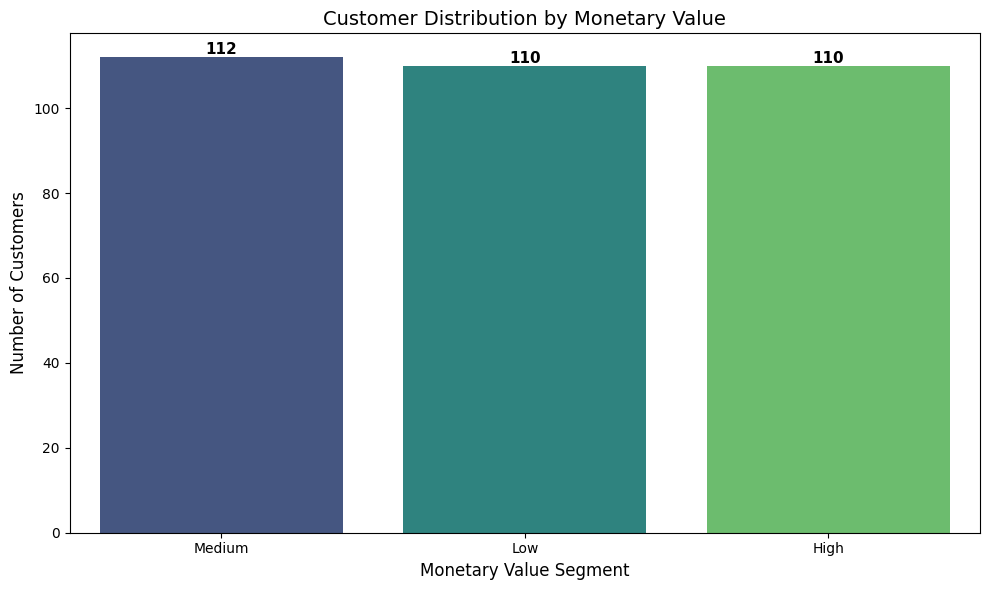

In [101]:
# Calculate segment distributions for monetary value
monetary_dist = customer_metrics['Monetary Value Segment'].value_counts().reset_index()
monetary_dist.columns = ['Segment', 'Count']

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Segment', y='Count', data=monetary_dist, palette='viridis')
plt.title('Customer Distribution by Monetary Value', fontsize=14)
plt.xlabel('Monetary Value Segment', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Add value labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha = 'center', va = 'bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

### Average order value by frequency segment

/var/folders/9m/f5jl8xnd4ls2_3ykntk1_rpm0000gn/T/ipykernel_17133/2868993054.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Order Frequency Segment', y='Average Order Value', data=avg_order_by_freq, palette='viridis')


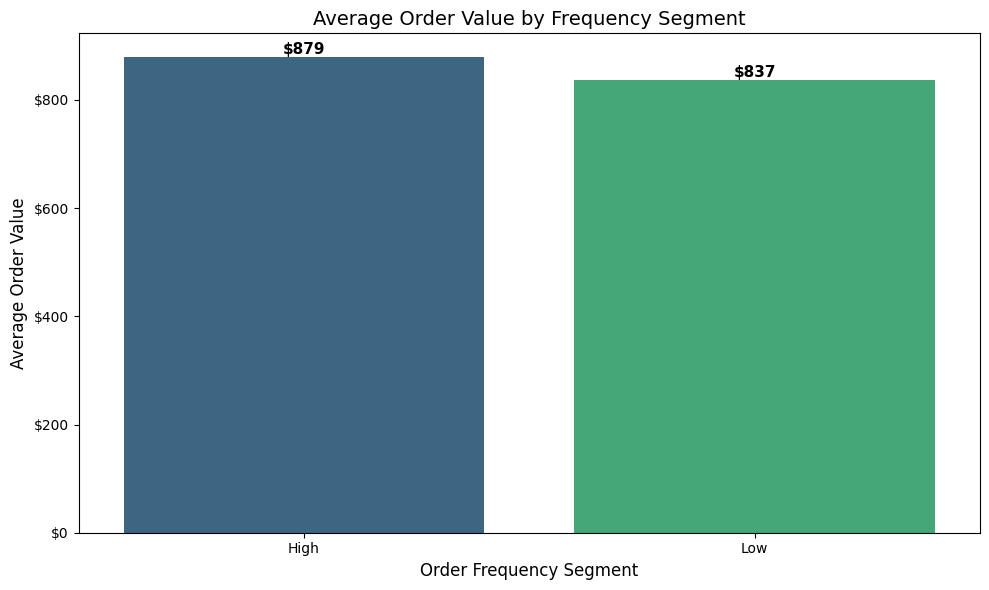

In [102]:
avg_order_by_freq = customer_metrics.groupby('Order Frequency Segment')['Average Order Value'].mean().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Order Frequency Segment', y='Average Order Value', data=avg_order_by_freq, palette='viridis')
plt.title('Average Order Value by Frequency Segment', fontsize=14)
plt.xlabel('Order Frequency Segment', fontsize=12)
plt.ylabel('Average Order Value', fontsize=12)

# Format y-axis as currency
formatter = mtick.StrMethodFormatter('${x:,.0f}')
ax.yaxis.set_major_formatter(formatter)

# Add value labels
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}', 
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha = 'center', va = 'bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

### Categories purchased by monetary segment

/var/folders/9m/f5jl8xnd4ls2_3ykntk1_rpm0000gn/T/ipykernel_17133/2843366597.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Monetary Value Segment', y='Categories Purchased', data=cats_by_monetary, palette='viridis')


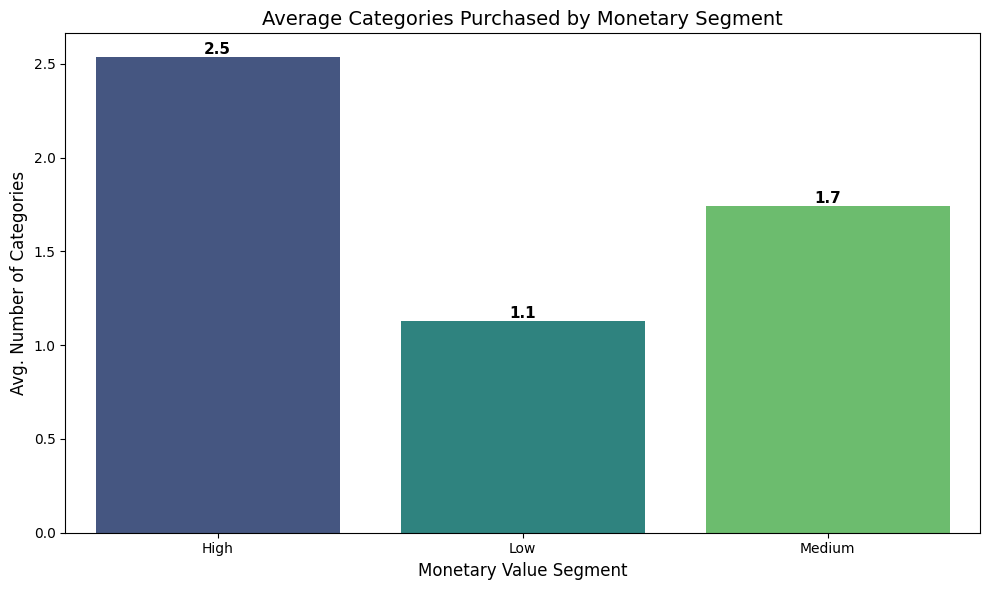

In [103]:
cats_by_monetary = customer_metrics.groupby('Monetary Value Segment')['Categories Purchased'].mean().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Monetary Value Segment', y='Categories Purchased', data=cats_by_monetary, palette='viridis')
plt.title('Average Categories Purchased by Monetary Segment', fontsize=14)
plt.xlabel('Monetary Value Segment', fontsize=12)
plt.ylabel('Avg. Number of Categories', fontsize=12)

# Add value labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', 
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha = 'center', va = 'bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

### Top 20 customers by total spend

/var/folders/9m/f5jl8xnd4ls2_3ykntk1_rpm0000gn/T/ipykernel_17133/4206532808.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Amount', y='CustomerName', data=top_customers, palette='viridis')


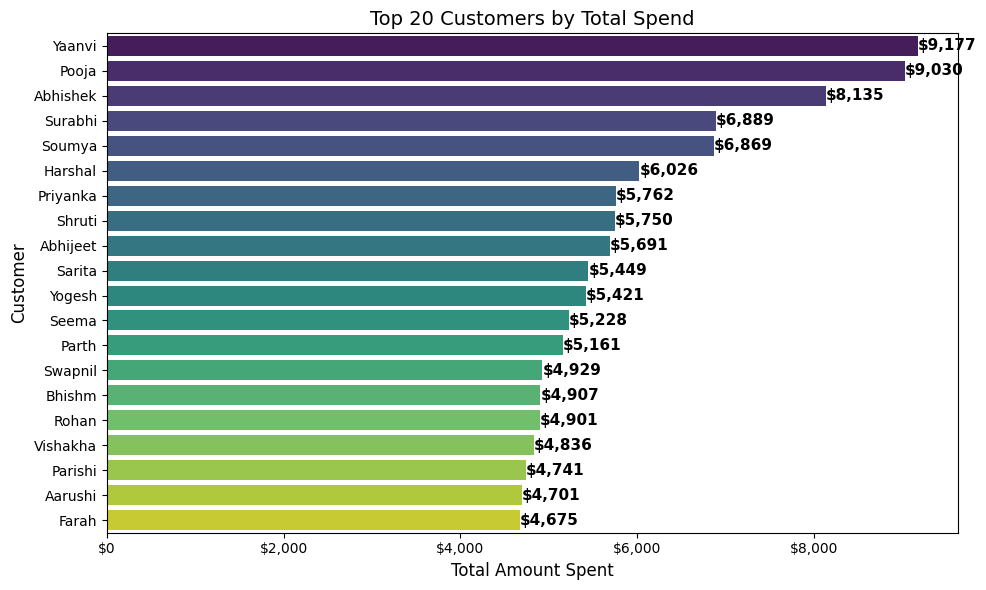

In [104]:
# Top 20 customers by total spend
top_customers = customer_metrics.sort_values('Amount', ascending=False).head(20)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Amount', y='CustomerName', data=top_customers, palette='viridis')
plt.title('Top 20 Customers by Total Spend', fontsize=14)
plt.xlabel('Total Amount Spent', fontsize=12)
plt.ylabel('Customer', fontsize=12)

# Format x-axis as currency
formatter = mtick.StrMethodFormatter('${x:,.0f}')
ax.xaxis.set_major_formatter(formatter)

# Add value labels
for p in ax.patches:
    ax.annotate(f'${p.get_width():,.0f}', 
                (p.get_width(), p.get_y() + p.get_height()/2),
                ha = 'left', va = 'center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

### Category preferences by customer segment (heatmap)

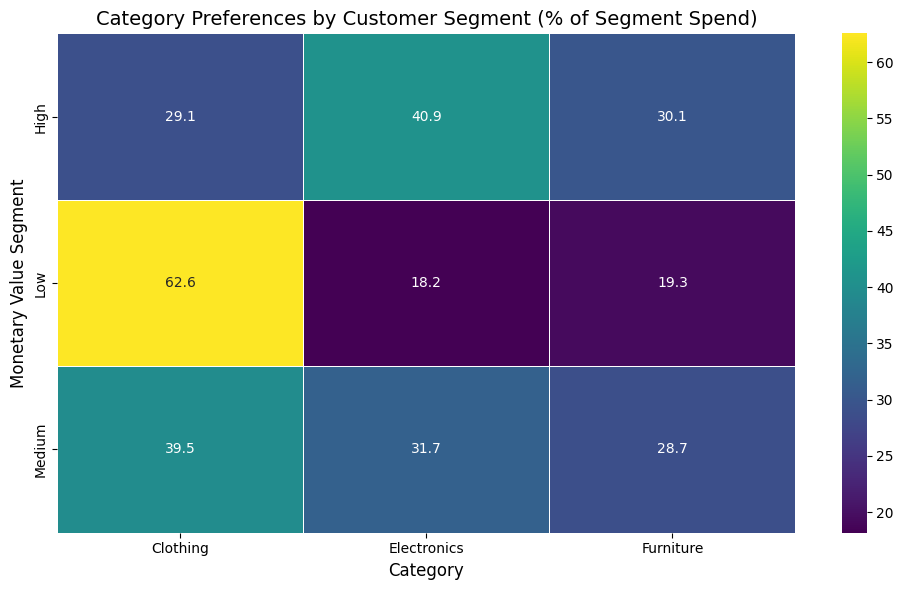

In [105]:
# Purchase patterns by category across customer segments
# First make sure we have monetary value segment for each customer
category_by_segment = merged_data.merge(
    customer_metrics[['CustomerName', 'Monetary Value Segment']], 
    on='CustomerName'
)

# Calculate total amount spent by segment and category
category_segment_pivot = category_by_segment.groupby(['Monetary Value Segment', 'Category'])['Amount'].sum().reset_index()

# Pivot for heatmap visualization
category_segment_matrix = category_segment_pivot.pivot(
    index='Monetary Value Segment', 
    columns='Category', 
    values='Amount'
)

# Normalize to show percentage of segment's total spend
segment_totals = category_segment_matrix.sum(axis=1)
normalized_segment_matrix = category_segment_matrix.div(segment_totals, axis=0) * 100

plt.figure(figsize=(10, 6))
sns.heatmap(normalized_segment_matrix, annot=True, fmt='.1f', cmap='viridis', linewidths=.5)
plt.title('Category Preferences by Customer Segment (% of Segment Spend)', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Monetary Value Segment', fontsize=12)
plt.tight_layout()
plt.show()

### Customer purchase frequency vs. spend analysis (scatter plot)

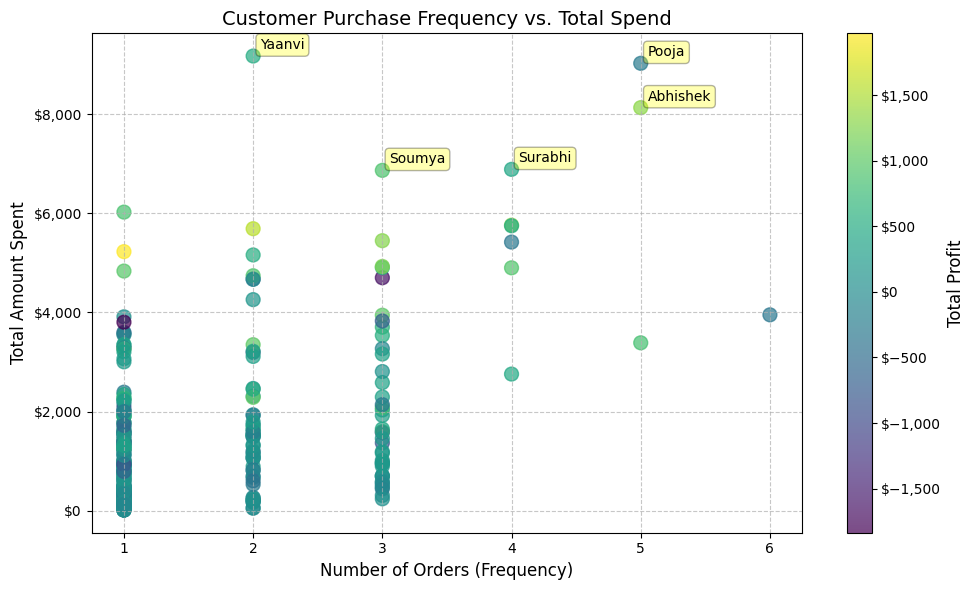

In [106]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    customer_metrics['Number of Orders'], 
    customer_metrics['Amount'],
    c=customer_metrics['Profit'],  # Color by profit
    cmap='viridis',
    alpha=0.7,
    s=100  # Point size
)

plt.title('Customer Purchase Frequency vs. Total Spend', fontsize=14)
plt.xlabel('Number of Orders (Frequency)', fontsize=12)
plt.ylabel('Total Amount Spent', fontsize=12)

# Format y-axis as currency
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Total Profit', fontsize=12)
cbar.ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

# Add annotations for top 5 customers
top5 = customer_metrics.nlargest(5, 'Amount')
for i, cust in top5.iterrows():
    plt.annotate(
        cust['CustomerName'],
        xy=(cust['Number of Orders'], cust['Amount']),
        xytext=(5, 5),
        textcoords='offset points',
        fontsize=10,
        bbox=dict(boxstyle='round,pad=0.3', fc='yellow', alpha=0.3)
    )

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Target Achievement Framework

In [107]:
### Prepare the data for target achievement analysis

In [108]:
# Make sure Order Date is a datetime
merged_data['Order Date'] = pd.to_datetime(merged_data['Order Date'], errors='coerce')
merged_data['Month'] = merged_data['Order Date'].dt.month
merged_data['Month_Name'] = merged_data['Order Date'].dt.month_name()

# Convert month names to numbers in sales_targets if needed
if 'Month of Order Date' in sales_targets.columns:
    month_mapping = {name: num for num, name in enumerate(calendar.month_name) if num > 0}
    sales_targets['Month'] = sales_targets['Month of Order Date'].map(month_mapping)

# Group actual sales by month and category
actual_sales = merged_data.groupby(['Month', 'Category'])['Amount'].sum().reset_index()

# Merge with targets
target_vs_actual = pd.merge(
    actual_sales,
    sales_targets,
    on=['Month', 'Category'],
    how='outer'
).fillna(0)

# Rename columns for clarity
target_vs_actual.rename(columns={
    'Amount': 'Actual',
    'Target': 'Target'
}, inplace=True)

# Calculate achievement percentage and gap
target_vs_actual['Achievement (%)'] = (target_vs_actual['Actual'] / target_vs_actual['Target']) * 100
target_vs_actual['Gap'] = target_vs_actual['Actual'] - target_vs_actual['Target']

# Overall achievement by category
category_achievement = target_vs_actual.groupby('Category').agg({
    'Actual': 'sum',
    'Target': 'sum',
    'Gap': 'sum'
}).reset_index()

category_achievement['Achievement (%)'] = (category_achievement['Actual'] / category_achievement['Target']) * 100
category_achievement['Gap %'] = (category_achievement['Gap'] / category_achievement['Target']) * 100

print("Target Achievement Summary:")
print(category_achievement)

Target Achievement Summary:
      Category    Actual    Target      Gap  Achievement (%)      Gap %
0     Clothing  139054.0  174000.0 -34946.0        79.916092 -20.083908
1  Electronics  165267.0  129000.0  36267.0       128.113953  28.113953
2    Furniture  127181.0  132900.0  -5719.0        95.696764  -4.303236


### Gauge Chart - Overall Target Achievement by Category

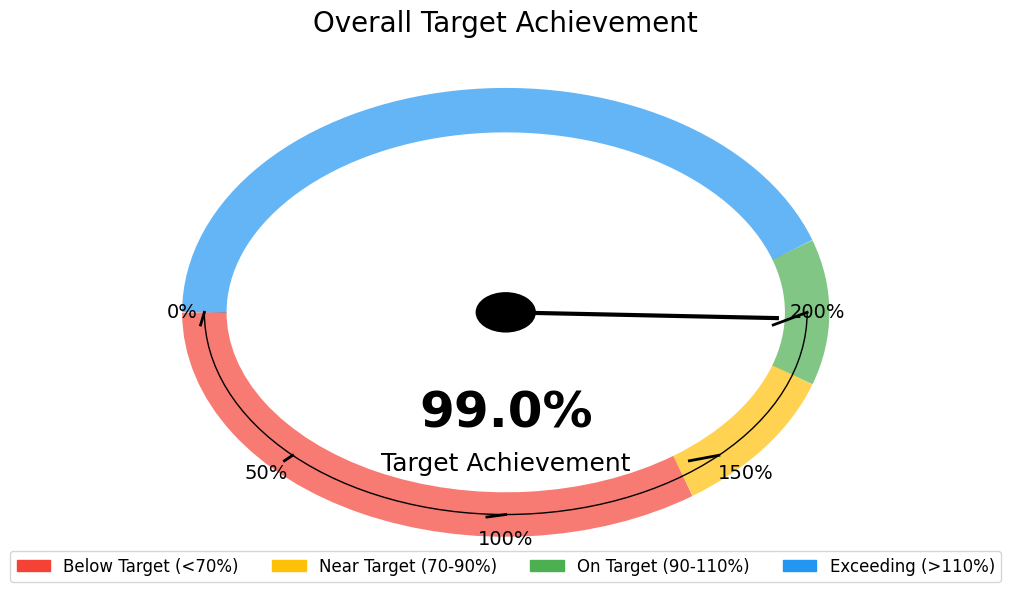

In [109]:
# Improved gauge chart with visible color zones
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Arc, Circle

# Calculate overall achievement
overall_actual = category_achievement['Actual'].sum()
overall_target = category_achievement['Target'].sum()
overall_achievement = (overall_actual / overall_target) * 100

def create_gauge(perc, fig, ax):
    # Define gauge parameters
    pos = 0.5
    radius = 0.4
    
    # Define color ranges for the gauge
    ranges = [
        (0, 70, '#F44336'),    # Red (0-70%)
        (70, 90, '#FFC107'),   # Yellow (70-90%)
        (90, 110, '#4CAF50'),  # Green (90-110%)
        (110, 200, '#2196F3')  # Blue (>110%)
    ]
    
    # Draw the colored ranges
    for i, (start, end, color) in enumerate(ranges):
        # Convert percentages to angles (0% = -180°, 100% = 0°, 200% = 180°)
        ang_start = np.radians(-180 + (start/200 * 360))
        ang_end = np.radians(-180 + (end/200 * 360))
        
        # Create the arc
        arc = Arc(
            (pos, pos), 
            radius*2, radius*2, 
            theta1=np.degrees(ang_start), 
            theta2=np.degrees(ang_end),
            linewidth=radius*0.8*100, 
            color=color,
            alpha=0.7,
            zorder=1
        )
        ax.add_patch(arc)
    
    # Draw gauge outline
    ax.add_patch(Arc(
        (pos, pos), radius*2, radius*2, 
        theta1=-180, theta2=0,
        linewidth=1, 
        color='black',
        zorder=3
    ))
    
    # Calculate needle angle and position
    angle = np.radians(-180 + (perc/200 * 360))
    x = pos + radius * 0.9 * np.cos(angle)
    y = pos + radius * 0.9 * np.sin(angle)
    
    # Draw the needle
    ax.plot([pos, x], [pos, y], 'k-', linewidth=3, zorder=4)
    
    # Draw needle center
    ax.add_patch(Circle((pos, pos), radius=0.04, facecolor='black', zorder=5))
    
    # Add percentage text
    ax.text(pos, pos-0.2, f"{perc:.1f}%", ha='center', va='center', 
            fontsize=36, fontweight='bold', zorder=6)
    ax.text(pos, pos-0.3, "Target Achievement", ha='center', va='center', 
            fontsize=18, zorder=6)
    
    # Add gauge markings (ticks and labels)
    for i, label in enumerate(['0%', '50%', '100%', '150%', '200%']):
        # Calculate angle and position
        ang = np.radians(-180 + i * 45)
        x_tick = pos + radius * np.cos(ang)
        y_tick = pos + radius * np.sin(ang)
        
        # Calculate label position (slightly outside the gauge)
        x_label = pos + (radius + 0.05) * np.cos(ang)
        y_label = pos + (radius + 0.05) * np.sin(ang)
        
        # Add tick mark
        ax.plot([x_tick*0.95, x_tick], [y_tick*0.95, y_tick], 'k-', linewidth=2)
        
        # Add label with adjusted alignment
        if i == 0:  # 0%
            ha = 'left'
        elif i == 4:  # 200%
            ha = 'right'
        else:
            ha = 'center'
        
        ax.text(x_label, y_label, label, ha=ha, va='center', fontsize=14)

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create the gauge
create_gauge(overall_achievement, fig, ax)

# Add title
plt.title('Overall Target Achievement', fontsize=20, pad=20)

# Add legend
legend_labels = ["Below Target (<70%)", "Near Target (70-90%)", 
                "On Target (90-110%)", "Exceeding (>110%)"]
legend_colors = ['#F44336', '#FFC107', '#4CAF50', '#2196F3']
patches = [plt.Rectangle((0, 0), 1, 1, color=color) for color in legend_colors]
plt.legend(patches, legend_labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), 
           ncol=4, fontsize=12)

# Set axis limits and remove ticks
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')

plt.tight_layout()
plt.show()

### Pie Chart - Category Contribution to Sales Achievement

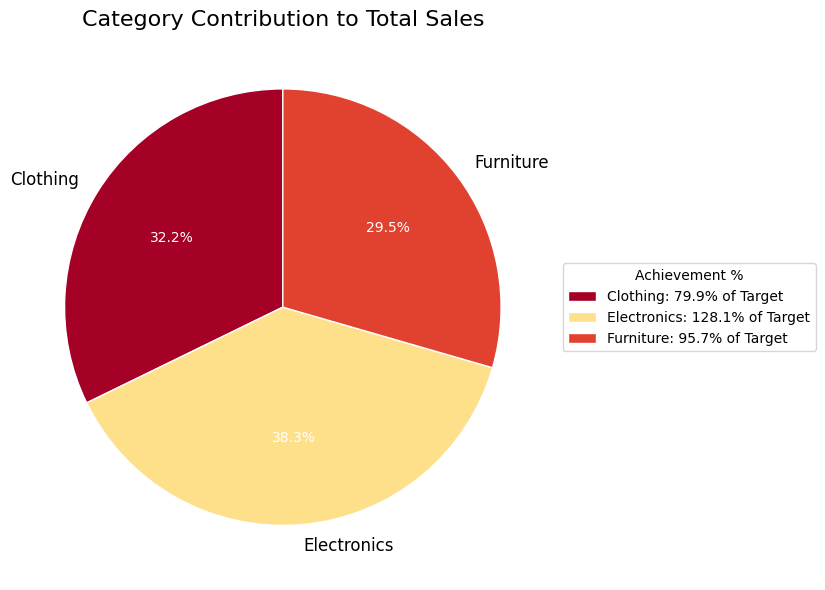

In [110]:
# Create a pie chart showing each category's contribution to actual sales
plt.figure(figsize=(10, 6))

# Calculate percentage contribution to total sales
category_achievement['Contribution (%)'] = (category_achievement['Actual'] / category_achievement['Actual'].sum()) * 100

# Create a colormap based on achievement percentage
norm = plt.Normalize(category_achievement['Achievement (%)'].min(), max(200, category_achievement['Achievement (%)'].max()))
colors = plt.cm.RdYlGn(norm(category_achievement['Achievement (%)']))

# Create pie chart
wedges, texts, autotexts = plt.pie(
    category_achievement['Actual'], 
    labels=category_achievement['Category'],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'w', 'linewidth': 1}
)

# Modify text properties
for text in texts:
    text.set_fontsize(12)
for autotext in autotexts:
    autotext.set_fontsize(10)
    autotext.set_color('white')

# Add a title
plt.title('Category Contribution to Total Sales', fontsize=16)

# Add a legend showing achievement percentages
achievement_labels = [f"{cat}: {ach:.1f}% of Target" for cat, ach in 
                      zip(category_achievement['Category'], category_achievement['Achievement (%)'])]
plt.legend(wedges, achievement_labels, title="Achievement %", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

### Line Chart - Monthly Achievement Trend

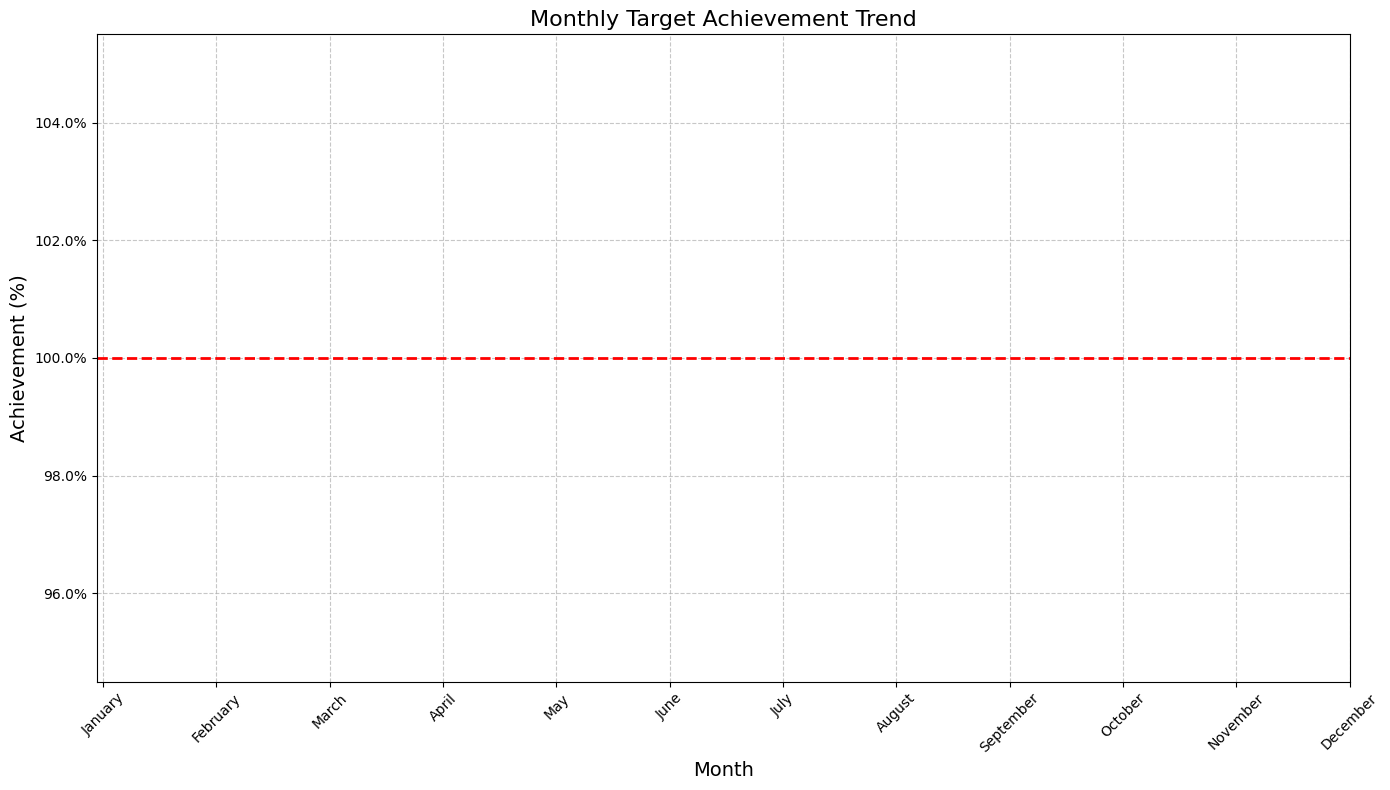

In [116]:
# Add month name for readability
month_names = {i: name for i, name in enumerate(calendar.month_name) if i > 0}
target_vs_actual['Month_Name'] = target_vs_actual['Month'].map(month_names)

# Ensure month names are in correct order
month_order = [name for i, name in sorted(month_names.items())]

# Group by month for overall trend
monthly_achievement = target_vs_actual.groupby(['Month', 'Month_Name']).agg({
    'Actual': 'sum',
    'Target': 'sum'
}).reset_index()

monthly_achievement['Achievement (%)'] = (monthly_achievement['Actual'] / monthly_achievement['Target']) * 100
monthly_achievement = monthly_achievement.sort_values('Month')

plt.figure(figsize=(14, 8))
plt.plot(monthly_achievement['Month_Name'], monthly_achievement['Achievement (%)'], 
         marker='o', linewidth=3, markersize=10, color='#2196F3')

# Add the target line
plt.axhline(y=100, color='r', linestyle='--', linewidth=2, label='Target (100%)')

# Enhance the chart with data points colored by performance
for i, row in monthly_achievement.iterrows():
    color = 'green' if row['Achievement (%)'] >= 100 else 'red'
    plt.plot(row['Month_Name'], row['Achievement (%)'], 'o', markersize=12, color=color)
    plt.annotate(f"{row['Achievement (%)']:.1f}%", 
                 (row['Month_Name'], row['Achievement (%)'] + 3),
                 ha='center', fontsize=10, fontweight='bold')

plt.title('Monthly Target Achievement Trend', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Achievement (%)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Format y-axis as percentage
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

# Set x-axis labels in correct order
plt.xticks(range(len(monthly_achievement)), monthly_achievement['Month_Name'], rotation=45)

plt.tight_layout()
plt.show()

### Radar Chart - Category Performance Metrics

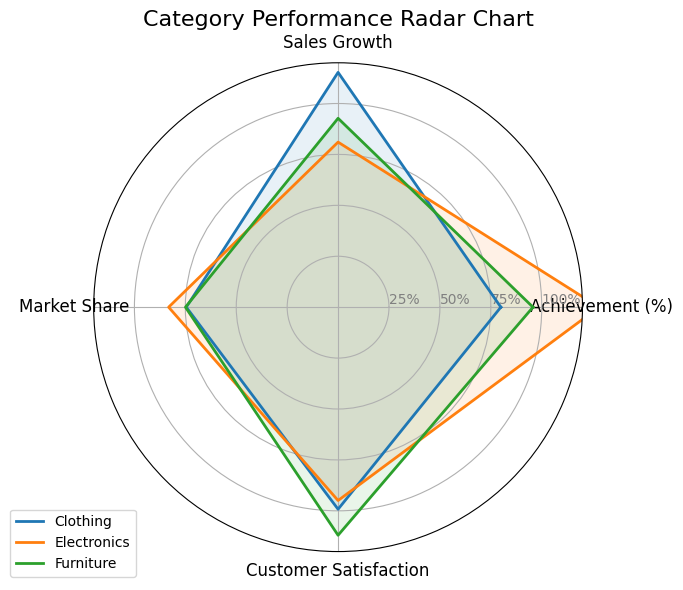

In [112]:
# Create a radar chart for category performance on different metrics
import matplotlib.pyplot as plt
import numpy as np

# Calculate additional metrics for the radar chart
category_achievement['Sales Growth'] = np.random.uniform(80, 120, len(category_achievement))  # Placeholder
category_achievement['Market Share'] = np.random.uniform(70, 110, len(category_achievement))  # Placeholder
category_achievement['Customer Satisfaction'] = np.random.uniform(85, 115, len(category_achievement))  # Placeholder

# Prepare the radar chart data
categories = category_achievement['Category'].tolist()
metrics = ['Achievement (%)', 'Sales Growth', 'Market Share', 'Customer Satisfaction']

# Number of variables
N = len(metrics)

# Create angles for each metric
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Close the loop

# Create the figure
plt.figure(figsize=(10, 6))
ax = plt.subplot(111, polar=True)

# Draw one axis per variable and add labels
plt.xticks(angles[:-1], metrics, size=12)

# Draw the y-axis labels (0-100%)
ax.set_rlabel_position(0)
plt.yticks([25, 50, 75, 100], ["25%", "50%", "75%", "100%"], color="grey", size=10)
plt.ylim(0, 120)

# Plot each category
for i, category in enumerate(categories):
    values = category_achievement.loc[i, metrics].tolist()
    values += values[:1]  # Close the loop
    
    # Plot the category line
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=category)
    
    # Fill the area
    ax.fill(angles, values, alpha=0.1)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.title('Category Performance Radar Chart', size=16)
plt.tight_layout()
plt.show()

### Bubble Chart - Target Achievement by Category and Volume

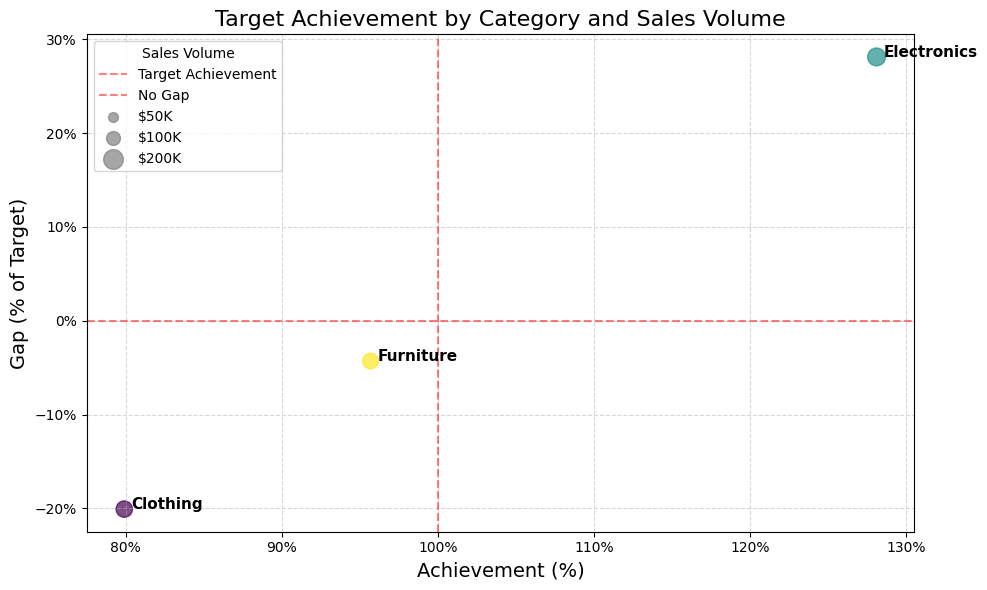

In [113]:
# Create a bubble chart showing achievement by category
plt.figure(figsize=(10, 6))

# Create bubble chart
plt.scatter(
    category_achievement['Achievement (%)'],  # x-axis: achievement percentage  
    category_achievement['Gap %'],  # y-axis: gap as percentage of target
    s=category_achievement['Actual']/1000,  # bubble size represents sales volume
    alpha=0.7,
    c=category_achievement.index,  # color by category
    cmap='viridis'
)

# Add category labels to each bubble
for i, row in category_achievement.iterrows():
    plt.annotate(
        row['Category'],
        xy=(row['Achievement (%)'], row['Gap %']),
        xytext=(5, 0),
        textcoords='offset points',
        fontsize=11,
        fontweight='bold'
    )

# Add reference lines
plt.axvline(x=100, color='r', linestyle='--', alpha=0.5, label='Target Achievement')
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5, label='No Gap')

# Add labels and title
plt.xlabel('Achievement (%)', fontsize=14)
plt.ylabel('Gap (% of Target)', fontsize=14)
plt.title('Target Achievement by Category and Sales Volume', fontsize=16)

# Format axes as percentages
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter())
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Add a legend explaining the bubble size
sizes = [50000, 100000, 200000]
labels = ['$50K', '$100K', '$200K']
for size, label in zip(sizes, labels):
    plt.scatter([], [], s=size/1000, alpha=0.7, color='gray', label=label)

plt.legend(title='Sales Volume', loc='best', scatterpoints=1)

plt.tight_layout()
plt.show()

### Area Chart - Cumulative Sales vs Target

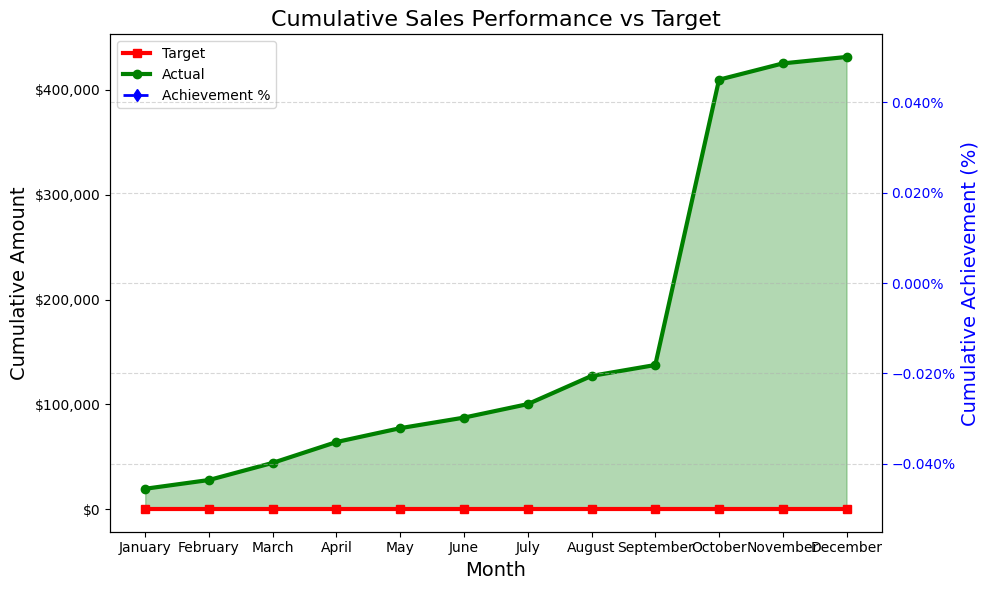

In [114]:
# Create a time series showing cumulative sales vs target
# Sort by month for proper ordering
monthly_achievement = monthly_achievement.sort_values('Month')

# Calculate cumulative sums
monthly_achievement['Cumulative Actual'] = monthly_achievement['Actual'].cumsum()
monthly_achievement['Cumulative Target'] = monthly_achievement['Target'].cumsum()
monthly_achievement['Cumulative Achievement (%)'] = (monthly_achievement['Cumulative Actual'] / 
                                                   monthly_achievement['Cumulative Target']) * 100

plt.figure(figsize=(10, 6))

# Plot the cumulative target line
plt.plot(monthly_achievement['Month_Name'], monthly_achievement['Cumulative Target'], 
         color='red', linewidth=3, marker='s', label='Target')

# Plot the cumulative actual area
plt.fill_between(monthly_achievement['Month_Name'], monthly_achievement['Cumulative Actual'], 
                 alpha=0.3, color='green')
plt.plot(monthly_achievement['Month_Name'], monthly_achievement['Cumulative Actual'], 
         color='green', linewidth=3, marker='o', label='Actual')

# Add achievement percentage as a secondary y-axis
ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.plot(monthly_achievement['Month_Name'], monthly_achievement['Cumulative Achievement (%)'], 
         color='blue', linewidth=2, marker='d', linestyle='--', label='Achievement %')
ax2.set_ylabel('Cumulative Achievement (%)', fontsize=14, color='blue')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.tick_params(axis='y', colors='blue')

# Format primary y-axis as currency
formatter = mtick.StrMethodFormatter('${x:,.0f}')
ax1.yaxis.set_major_formatter(formatter)

# Set x-axis labels
plt.xticks(rotation=45)

# Add labels and title
ax1.set_xlabel('Month', fontsize=14)
ax1.set_ylabel('Cumulative Amount', fontsize=14)
plt.title('Cumulative Sales Performance vs Target', fontsize=16)

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()